<div style="text-align: center;">
    <h1 style="color:black;" > ANEMIA EN NIÑOS ENTRE 6 Y 36 MESES EN EL PERÚ <a id="indice"></a> </h1>
</div>

<h1 style="color:black;" > Importación de librerías <a id="1"></a> </h1>

Se importan las librerías necesarias para ambos objetivos:

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

!pip install missingno
import missingno
!pip install upsetplot pyjanitor==0.23.1
import upsetplot
import janitor
import scipy.stats

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

!pip install tensorflow
!pip install visualkeras
import visualkeras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 6.8 MB/s eta 0:00:00
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24817 sha256=492d4d2fd2bc869fc95d87d5a38482104ceee1e4b84cd1fb021bd9220be1b556
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 13.1 MB/s eta 0:00:00


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<h1 style="color:black;" > 1. Extracción de datos <a id="3"></a> </h1>

Accedemos y leemos el archivo que está almacenado en nuestro entorno de trabajo, el cual contiene el conjunto de datos:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Proyecto/datos_limpios.csv')

In [ ]:
df.head()

In [ ]:
df.info()

<h1 style="color:black;" > 6. Elección de características más relacionadas <a id="7"></a> </h1>

<h2 style="color:black;" > 6.1. Variable objetivo categórica multiclase <a id="7"></a> </h2>

In [ ]:
matriz_correlación_multiclase1 = df.corr()

filtro_variables_multiclase1 = {
    variable: matriz_correlación_multiclase1['nivel_anemia'][variable]
    for variable in matriz_correlación_multiclase1.index
    if abs(matriz_correlación_multiclase1['nivel_anemia'][variable]) >= 0.00
}

filtro_ordenado_multiclase1 = dict(sorted(filtro_variables_multiclase1.items(), key=lambda item: abs(item[1]), reverse=True))

print(f"Número de variables: {len(filtro_ordenado_multiclase1)}")
print("Variables con correlación mayor e igual al 0% con 'nivel_anemia':")
for variable, correlación in filtro_ordenado_multiclase1.items():
    print(f"{variable}: {correlación:.3f}")

In [ ]:
filtro_nombres_multiclase1 = list(filtro_ordenado_multiclase1.keys())
filtro_nombres_multiclase1

In [ ]:
df_multiclase_filtro1 = df[filtro_nombres_multiclase1]
df_multiclase_filtro1.info()

In [ ]:
df_multiclase_filtro1 = df_multiclase_filtro1.drop(['nivel_hemoglobina_ajustada_g/dl',
                                                'anemia',
                                                'edad_niño',
                                                'edad_meses',
                                                'índice_riqueza',
                                                'pobreza',
                                                'amamantamiento2',
                                                'nivel_anemia_madre',
                                                'material_piso',
                                                'n_meses_lactancia',
                                                'consumo_leche',
                                                'lugar_residencia',
                                                'diversidad_dietética',
                                                'nivel_educativo_esposo_compañero_merge5',
                                                'hierro_última_semana',
                                                'niño_afiliado_sis',
                                                'menores_cinco_años',
                                                'nivel_educativo_esposo_compañero_2',
                                                'seguro_salud_integral',
                                                'b_otra_leche_fresca_evaporada_polvo',
                                                'n_orden_nacimiento',
                                                'b_leche_polvo_nam_s26_similac',
                                                'orden_nacimiento2',
                                                'queso_yogurt_otros_lácteos',
                                                'edad_madre3',
                                                'edad_madre2',
                                                'lavado_manos_antes_alimentar_niño',
                                                'parto_institución_salud',
                                                'seguro_salud_privado',
                                                'tamaño_hogar',
                                                'lavado_manos_después_baño',
                                                'seguro_salud_compañía_seguros',
                                                'hierro_jarabe_última_semana',
                                                'violencia_física_menos_severa',
                                                'lavado_manos_antes_preparar_comida',
                                                'seguro_salud_militar',
                                                'seguro_salud_público',
                                                'seguro_salud_seguro_privado',
                                                'fuente_agua_para_beber',
                                                'seguro_salud_no_tiene',
                                                'b_leche_materna_refrigerada_conservada',
                                                'hierro_polvo_micronutrientes_última_semana',
                                                'lavado_manos_después_pañales',
                                                'violencia_emocional',
                                                'violencia_sexual',
                                                'hierro_otro_última_semana'], axis = 1)
df_multiclase_filtro1.info()

In [ ]:
y2 = df_multiclase_filtro1['nivel_anemia']
y2.shape

In [ ]:
X2 = df_multiclase_filtro1.drop('nivel_anemia', axis = 1)
X2.shape

In [ ]:
matriz_correlación_multiclase2 = df_multiclase_filtro1.corr()

filtro_variables_multiclase2 = {
    variable: matriz_correlación_multiclase2['nivel_anemia'][variable]
    for variable in matriz_correlación_multiclase2.index
    if abs(matriz_correlación_multiclase2['nivel_anemia'][variable]) >= 0.07
}

filtro_ordenado_multiclase2 = dict(sorted(filtro_variables_multiclase2.items(), key=lambda item: abs(item[1]), reverse=True))

print(f"Número de variables: {len(filtro_ordenado_multiclase2)}")
print("Variables con correlación mayor e igual al 3% con 'nivel_anemia':")
for variable, correlación in filtro_ordenado_multiclase2.items():
    print(f"{variable}: {correlación:.3f}")

In [ ]:
filtro_nombres_multiclase2 = list(filtro_ordenado_multiclase2.keys())
filtro_nombres_multiclase2

In [ ]:
df_multiclase_filtro2 = df[filtro_nombres_multiclase2]
df_multiclase_filtro2.info()

In [ ]:
y2_filtro = df_multiclase_filtro2['nivel_anemia']
y2_filtro.shape

In [ ]:
X2_filtro = df_multiclase_filtro2.drop('nivel_anemia', axis = 1)
X2_filtro.shape

<h2 style="color:black;" > 6.2. Variable objetivo categórica binaria <a id="7"></a> </h2>

In [ ]:
matriz_correlación_binaria1 = df.corr()

filtro_variables_binaria1 = {
    variable: matriz_correlación_binaria1['anemia'][variable]
    for variable in matriz_correlación_binaria1.index
    if abs(matriz_correlación_binaria1['anemia'][variable]) >= 0.00
}

filtro_ordenado_binaria1 = dict(sorted(filtro_variables_binaria1.items(), key=lambda item: abs(item[1]), reverse=True))

print(f"Número de variables: {len(filtro_ordenado_binaria1)}")
print("Variables con correlación mayor e igual al 0% con 'anemia':")
for variable, correlación in filtro_ordenado_binaria1.items():
    print(f"{variable}: {correlación:.3f}")

In [ ]:
filtro_nombres_binaria1 = list(filtro_ordenado_binaria1.keys())
filtro_nombres_binaria1

In [ ]:
df_binaria_filtro1 = df[filtro_nombres_binaria1]
df_binaria_filtro1.info()

In [ ]:
df_binaria_filtro1 = df_binaria_filtro1.drop(['nivel_hemoglobina_ajustada_g/dl',
                                                'nivel_anemia',
                                                'edad_niño',
                                                'edad_meses',
                                                'índice_riqueza',
                                                'pobreza',
                                                'amamantamiento2',
                                                'nivel_anemia_madre',
                                                'material_piso',
                                                'n_meses_lactancia',
                                                'consumo_leche',
                                                'lugar_residencia',
                                                'diversidad_dietética',
                                                'nivel_educativo_esposo_compañero_merge5',
                                                'hierro_última_semana',
                                                'seguro_salud_essalud/ipss',
                                                'menores_cinco_años',
                                                'nivel_educativo_esposo_compañero_2',
                                                'seguro_salud_integral',
                                                'b_otra_leche_fresca_evaporada_polvo',
                                                'n_orden_nacimiento',
                                                'b_leche_polvo_nam_s26_similac',
                                                'orden_nacimiento2',
                                                'queso_yogurt_otros_lácteos',
                                                'edad_madre3',
                                                'edad_madre2',
                                                'lavado_manos_antes_alimentar_niño',
                                                'parto_institución_salud',
                                                'seguro_salud_privado',
                                                'tamaño_hogar',
                                                'lavado_manos_después_baño',
                                                'seguro_salud_compañía_seguros',
                                                'hierro_jarabe_última_semana',
                                                'violencia_física_menos_severa',
                                                'lavado_manos_antes_preparar_comida',
                                                'seguro_salud_militar',
                                                'seguro_salud_público',
                                                'seguro_salud_seguro_privado',
                                                'fuente_agua_para_beber',
                                                'seguro_salud_no_tiene',
                                                'b_leche_materna_refrigerada_conservada',
                                                'hierro_polvo_micronutrientes_última_semana',
                                                'lavado_manos_después_pañales',
                                                'violencia_emocional',
                                                'violencia_sexual',
                                                'hierro_otro_última_semana'], axis = 1)
df_binaria_filtro1.info()

In [ ]:
y3 = df_binaria_filtro1['anemia']
y3.shape

In [ ]:
X3 = df_binaria_filtro1.drop('anemia', axis = 1)
X3.shape

In [ ]:
matriz_correlación_binaria2 = df_binaria_filtro1.corr()

filtro_variables_binaria2 = {
    variable: matriz_correlación_binaria2['anemia'][variable]
    for variable in matriz_correlación_binaria2.index
    if abs(matriz_correlación_binaria2['anemia'][variable]) >= 0.07
}

filtro_ordenado_binaria2 = dict(sorted(filtro_variables_binaria2.items(), key=lambda item: abs(item[1]), reverse=True))

print(f"Número de variables: {len(filtro_ordenado_binaria2)}")
print("Variables con correlación mayor e igual al 7% con 'anemia':")
for variable, correlación in filtro_ordenado_binaria2.items():
    print(f"{variable}: {correlación:.3f}")

In [ ]:
filtro_nombres_binaria2 = list(filtro_ordenado_binaria2.keys())
filtro_nombres_binaria2

In [ ]:
df_binaria_filtro2 = df[filtro_nombres_binaria2]
df_binaria_filtro2.info()

In [ ]:
y3_filtro = df_binaria_filtro2['anemia']
y3_filtro.shape

In [ ]:
X3_filtro = df_binaria_filtro2.drop('anemia', axis = 1)
X3_filtro.shape

<h1 style="color:black;" > 7. Preparación de datos para el modelado <a id="8"></a> </h1>

## Selección de variables

In [ ]:
categoricas_X1 = ['edad_niño2',
               'amamantamiento',
               'región_natural',
               'piso_vivienda',
               'n_veces_comida_sólida_semisólida_día_anterior',
               'orden_nacimiento',
               'nivel_educativo_madre',
               'lugar_parto',
               'nivel_educativo_esposo_compañero_REC91_22',
               'n_veces_lavado_manos',
               'persona_alimenta_niño',
               'fuente_agua',
               'tamaño_niño_al_nacer']
columnas_X1 = X1.columns.tolist()
escalables_X1 = [col for col in columnas_X1 if col not in categoricas_X1]


categoricas_X1_filtro = ['edad_niño2',
               'amamantamiento',
               'región_natural',
               'piso_vivienda',
               'n_veces_comida_sólida_semisólida_día_anterior',
               'orden_nacimiento',
               'nivel_educativo_madre',
               'lugar_parto',
               'nivel_educativo_esposo_compañero_REC91_22',
               'n_veces_lavado_manos',
               'persona_alimenta_niño']
columnas_X1_filtro = X1_filtro.columns.tolist()
escalables_X1_filtro = [col for col in columnas_X1_filtro if col not in categoricas_X1_filtro]


categoricas_X2 = ['edad_niño2',
               'amamantamiento',
               'región_natural',
               'piso_vivienda',
               'n_veces_comida_sólida_semisólida_día_anterior',
               'orden_nacimiento',
               'nivel_educativo_madre',
               'lugar_parto',
               'nivel_educativo_esposo_compañero_REC91_22',
               'n_veces_lavado_manos',
               'persona_alimenta_niño',
               'fuente_agua',
               'tamaño_niño_al_nacer']
columnas_X2 = X2.columns.tolist()
escalables_X2 = [col for col in columnas_X2 if col not in categoricas_X2]

categoricas_X2_filtro = ['edad_niño2',
               'amamantamiento',
               'región_natural',
               'piso_vivienda',
               'n_veces_comida_sólida_semisólida_día_anterior',
               'orden_nacimiento',
               'nivel_educativo_madre',
               'lugar_parto']
columnas_X2_filtro = X2_filtro.columns.tolist()
escalables_X2_filtro = [col for col in columnas_X2_filtro if col not in categoricas_X2_filtro]


categoricas_X3 = ['edad_niño2',
               'amamantamiento',
               'región_natural',
               'piso_vivienda',
               'n_veces_comida_sólida_semisólida_día_anterior',
               'orden_nacimiento',
               'nivel_educativo_madre',
               'lugar_parto',
               'nivel_educativo_esposo_compañero_REC91_22',
               'n_veces_lavado_manos',
               'persona_alimenta_niño',
               'fuente_agua',
               'tamaño_niño_al_nacer']
columnas_X3 = X3.columns.tolist()
escalables_X3 = [col for col in columnas_X3 if col not in categoricas_X3]

categoricas_X3_filtro = ['edad_niño2',
               'amamantamiento',
               'región_natural',
               'piso_vivienda',
               'n_veces_comida_sólida_semisólida_día_anterior',
               'orden_nacimiento',
               'nivel_educativo_madre']
columnas_X3_filtro = X3_filtro.columns.tolist()
escalables_X3_filtro = [col for col in columnas_X3_filtro if col not in categoricas_X3_filtro]

## Escalador

Se escalará usando MinMaxScaler para estandarizar todas las variables en una rango de 0 y 1:

In [ ]:
minmax_scaler = MinMaxScaler()
one_hot_encoder = OneHotEncoder(drop='first')

## Imputador

In [ ]:
imputer_escalables = SimpleImputer(strategy="median")
imputer_categoricas = SimpleImputer(strategy="most_frequent")

## Transformador

In [ ]:
col_transformer_X2 = make_column_transformer((make_pipeline(minmax_scaler, imputer_escalables), escalables_X2),
                                              (make_pipeline(one_hot_encoder, imputer_categoricas), categoricas_X2),
                                              remainder = 'passthrough')
col_transformer_X2


col_transformer_X2_filtro = make_column_transformer((make_pipeline(minmax_scaler, imputer_escalables), escalables_X2_filtro),
                                              (make_pipeline(one_hot_encoder, imputer_categoricas), categoricas_X2_filtro),
                                              remainder = 'passthrough')
col_transformer_X2_filtro


col_transformer_X3 = make_column_transformer((make_pipeline(minmax_scaler, imputer_escalables), escalables_X3),
                                              (make_pipeline(one_hot_encoder, imputer_categoricas), categoricas_X3),
                                              remainder = 'passthrough')
col_transformer_X3


col_transformer_X3_filtro = make_column_transformer((make_pipeline(minmax_scaler, imputer_escalables), escalables_X3_filtro),
                                              (make_pipeline(one_hot_encoder, imputer_categoricas), categoricas_X3_filtro),
                                              remainder = 'passthrough')
col_transformer_X3_filtro

## DateFrame de las características transformado

In [ ]:
X2_encoded = pd.DataFrame(col_transformer_X2.fit_transform(X2),
                           columns = col_transformer_X2.get_feature_names_out(),
                           index = X2.index).rename_columns(
    function = lambda x: x.removeprefix('pipeline-1__')).rename_columns(
    function = lambda x: x.removeprefix('pipeline-2__')).rename_columns(
    function = lambda x: x.removeprefix('remainder__'))

X2_encoded.head()

In [ ]:
X2_filtro_encoded = pd.DataFrame(col_transformer_X2_filtro.fit_transform(X2_filtro),
                           columns = col_transformer_X2_filtro.get_feature_names_out(),
                           index = X2_filtro.index).rename_columns(
    function = lambda x: x.removeprefix('pipeline-1__')).rename_columns(
    function = lambda x: x.removeprefix('pipeline-2__')).rename_columns(
    function = lambda x: x.removeprefix('remainder__'))

X2_filtro_encoded.head()

In [ ]:
X3_encoded = pd.DataFrame(col_transformer_X3.fit_transform(X3),
                           columns = col_transformer_X3.get_feature_names_out(),
                           index = X3.index).rename_columns(
    function = lambda x: x.removeprefix('pipeline-1__')).rename_columns(
    function = lambda x: x.removeprefix('pipeline-2__')).rename_columns(
    function = lambda x: x.removeprefix('remainder__'))

X3_encoded.head()

In [ ]:
X3_filtro_encoded = pd.DataFrame(col_transformer_X3_filtro.fit_transform(X3_filtro),
                           columns = col_transformer_X3_filtro.get_feature_names_out(),
                           index = X3_filtro.index).rename_columns(
    function = lambda x: x.removeprefix('pipeline-1__')).rename_columns(
    function = lambda x: x.removeprefix('pipeline-2__')).rename_columns(
    function = lambda x: x.removeprefix('remainder__'))

X3_filtro_encoded.head()

<div style="text-align: left; margin-top: 2rem;">
  <button style="padding: 10px 20px; font-size: 12px; cursor: pointer; background-color: #f0f0f0; color: white; border: none;">
    <a href="#indice" style="color: black; text-decoration: none;">Regresar Tabla de contenido</a><br>
  </button>
</div>

## Conjunto de datos de entrenamiento (train) y prueba (test)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_encoded, y2, test_size=0.3, stratify=y2, random_state=42)
X2_filtro_train, X2_filtro_test, y2_filtro_train, y2_filtro_test = train_test_split(X2_filtro_encoded, y2_filtro, test_size=0.3, stratify=y2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_encoded, y3, test_size=0.3, stratify=y3, random_state=42)
X3_filtro_train, X3_filtro_test, y3_filtro_train, y3_filtro_test = train_test_split(X3_filtro_encoded, y3_filtro, test_size=0.3, stratify=y3, random_state=42)

<h1 style="color:black;" > 8. Modelos de aprendizaje automático <a id="21"></a> </h1>

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

# 6.1. Modelo de clasificación multiclase (2)

## 6.1.1. Con todas las características

### A. Validación cruzada

#### Mejor modelo de Regresión Logística

In [ ]:
param_grid_reg_clf_ovr = [{'penalty': ['l1', 'l2'],
                           'C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 50]}]

param_grid_reg_clf_ovo = [{'estimator__penalty': ['l1', 'l2'], 'estimator__C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 100]}]

In [ ]:
grid_reg_clf_ovr = LogisticRegression(solver='liblinear', multi_class='ovr')
grid_reg_clf_ovo = LogisticRegression(solver='liblinear')
clf_ovo = OneVsOneClassifier(grid_reg_clf_ovo)

grid_search_reg_clf_ovr = GridSearchCV(grid_reg_clf_ovr, param_grid_reg_clf_ovr, cv=5, scoring='accuracy')
grid_search_reg_clf_ovo = GridSearchCV(clf_ovo, param_grid_reg_clf_ovo, cv=5, scoring='accuracy')

grid_search_reg_clf_ovr.fit(X2_train, y2_train)
grid_search_reg_clf_ovo.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=LogisticRegression(solver='liblinear')),
             param_grid=[{'estimator__C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 50,
                                           100],
                          'estimator__penalty': ['l1', 'l2']}],
             scoring='accuracy')

#### Mejor modelo para KNN

In [ ]:
X2_train.shape

(6443, 104)

In [ ]:
param_grid_knn_clf = [{'n_neighbors': list(range(2, 50))}]

In [ ]:
grid_knn_clf = KNeighborsClassifier()

grid_search_knn_clf = GridSearchCV(grid_knn_clf, param_grid_knn_clf, cv=5, scoring='accuracy')

grid_search_knn_clf.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30,
                                          31, ...]}],
             scoring='accuracy')

#### Mejor modelo para Árbol de Decisión

In [ ]:
param_grid_tree_clf = [{'max_depth': list(range(1, 70))}]

In [ ]:
grid_tree_clf = DecisionTreeClassifier(random_state=42)

grid_search_tree_clf = GridSearchCV(grid_tree_clf, param_grid_tree_clf, cv=5, scoring='accuracy')

grid_search_tree_clf.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             scoring='accuracy')

#### Mejor modelo para Bosques Aleatorios

In [ ]:
param_grid_rndf_clf = [{'n_estimators': list(range(100, 701, 100)), 'max_depth': list(range(1, 60))}]

In [ ]:
grid_rndf_clf = RandomForestClassifier()

grid_search_rndf_clf = GridSearchCV(grid_rndf_clf, param_grid_rndf_clf, cv=5, scoring='accuracy')

grid_search_rndf_clf.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'n_estimators': [100, 200, 300, 400, 500, 600, 700]}],
             scoring='accuracy')

#### Mejor modelo para Aprendizaje Ensamblado

Método de conjunto Bagging:

In [ ]:
param_grid_bag_clf = [{'n_estimators': list(range(100, 701, 100)),
                      'max_samples': list(range(500, 1501, 100))}]

In [ ]:
grid_bag_clf = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True, random_state=42)

grid_search_bag_clf = GridSearchCV(grid_bag_clf, param_grid_bag_clf, cv=5, scoring='accuracy')

grid_search_bag_clf.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 600, 700, 800, 900, 1000, 1100,
                                          1200, 1300, 1400, 1500],
                          'n_estimators': [100, 200, 300, 400, 500, 600, 700]}],
             scoring='accuracy')

Método de conjunto Pasting:

In [ ]:
param_grid_pas_clf = [{'n_estimators': list(range(100, 701, 100)),
                       'max_samples': list(range(500, 1501, 100))}]

In [ ]:
grid_pas_clf = BaggingClassifier(DecisionTreeClassifier(), bootstrap=False, random_state=42)

grid_search_pas_clf = GridSearchCV(grid_pas_clf, param_grid_pas_clf, cv=5, scoring='accuracy')

grid_search_pas_clf.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(bootstrap=False,
                                         estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 600, 700, 800, 900, 1000, 1100,
                                          1200, 1300, 1400, 1500],
                          'n_estimators': [100, 200, 300, 400, 500, 600, 700]}],
             scoring='accuracy')

### B. Mejores hiperparámetros, puntajes y estimadores

In [ ]:
best_params_reg_clf_ovr = grid_search_reg_clf_ovr.best_params_
best_params_reg_clf_ovo = grid_search_reg_clf_ovo.best_params_
best_params_knn_clf = grid_search_knn_clf.best_params_
best_params_tree_clf = grid_search_tree_clf.best_params_
best_params_rndf_clf = grid_search_rndf_clf.best_params_
best_params_bag_clf = grid_search_bag_clf.best_params_
best_params_pas_clf = grid_search_pas_clf.best_params_

In [ ]:
best_score_reg_clf_ovr = grid_search_reg_clf_ovr.best_score_
best_score_reg_clf_ovo = grid_search_reg_clf_ovo.best_score_
best_score_knn_clf = grid_search_knn_clf.best_score_
best_score_tree_clf = grid_search_tree_clf.best_score_
best_score_rndf_clf = grid_search_rndf_clf.best_score_
best_score_bag_clf = grid_search_bag_clf.best_score_
best_score_pas_clf = grid_search_pas_clf.best_score_

In [ ]:
best_estimator_reg_clf_ovr = grid_search_reg_clf_ovr.best_estimator_
best_estimator_reg_clf_ovo = grid_search_reg_clf_ovo.best_estimator_
best_estimator_knn_clf = grid_search_knn_clf.best_estimator_
best_estimator_tree_clf = grid_search_tree_clf.best_estimator_
best_estimator_rndf_clf = grid_search_rndf_clf.best_estimator_
best_estimator_bag_clf = grid_search_bag_clf.best_estimator_
best_estimator_pas_clf = grid_search_pas_clf.best_estimator_

### C. Evaluación de los modelos

In [ ]:
best_params = {
    'Regresión Logística OvR': best_params_reg_clf_ovr,
    'Regresión Logística OvO': best_params_reg_clf_ovo,
    'KNN': best_params_knn_clf,
    'Árbol de Decisión': best_params_tree_clf,
    'Bosques Aleatorios': best_params_rndf_clf,
    'Bagging': best_params_bag_clf,
    'Pasting': best_params_pas_clf
}

best_scores = {
    'Regresión Logística OvR': best_score_reg_clf_ovr,
    'Regresión Logística OvO': best_score_reg_clf_ovo,
    'KNN': best_score_knn_clf,
    'Árbol de Decisión': best_score_tree_clf,
    'Bosques Aleatorios': best_score_rndf_clf,
    'Bagging': best_score_bag_clf,
    'Pasting': best_score_pas_clf
}

best_estimators = {
    'Regresión Logística OvR': best_estimator_reg_clf_ovr,
    'Regresión Logística OvO': best_estimator_reg_clf_ovo,
    'KNN': best_estimator_knn_clf,
    'Árbol de Decisión': best_estimator_tree_clf,
    'Bosques Aleatorios': best_estimator_rndf_clf,
    'Bagging': best_estimator_bag_clf,
    'Pasting': best_estimator_pas_clf
}

y_pred = {
    'Regresión Logística OvR': best_estimator_reg_clf_ovr.predict(X2_test),
    'Regresión Logística OvO': best_estimator_reg_clf_ovo.predict(X2_test),
    'KNN': best_estimator_knn_clf.predict(X2_test),
    'Árbol de Decisión': best_estimator_tree_clf.predict(X2_test),
    'Bosques Aleatorios': best_estimator_rndf_clf.predict(X2_test),
    'Bagging': best_estimator_bag_clf.predict(X2_test),
    'Pasting': best_estimator_pas_clf.predict(X2_test)
}

precision_scores = {}
recall_scores = {}
f1_scores = {}

for model, y_pred_test in y_pred.items():
    precision, recall, f1, _ = precision_recall_fscore_support(y2_test, y_pred_test, average=None, zero_division=1)
    precision_scores[model] = precision
    recall_scores[model] = recall
    f1_scores[model] = f1

sobreajuste = {}
for model, estimator in best_estimators.items():
    score_train = estimator.score(X2_train, y2_train)
    score_test = estimator.score(X2_test, y2_test)
    sobreajuste[model] = abs(score_train - score_test)

metricas_generales = pd.DataFrame({
    'Modelos': list(best_params.keys()),
    'Mejores Parámetros': list(best_params.values()),
    'Mejor Score (Train)': list(best_scores.values()),
    'Accuracy (Test)': [accuracy_score(y2_test, y_pred[model]) for model in best_params.keys()],
    'Sobreajuste': list(sobreajuste.values())
})

metricas_generales.set_index('Modelos', inplace=True)

metricas_clases = []
classes = len(set(y2_test))

for i in range(classes):
    metricas_clase = pd.DataFrame({
        'Modelos': list(best_params.keys()),
        f'Precision (Test) Clase {i}': [precision[i] for precision in precision_scores.values()],
        f'Recall (Test) Clase {i}': [recall[i] for recall in recall_scores.values()],
        f'F1 Score (Test) Clase {i}': [f1[i] for f1 in f1_scores.values()]
    })
    metricas_clase.set_index('Modelos', inplace=True)
    metricas_clases.append(metricas_clase)

def get_metricas_detalladas_por_clase(clase):
    if clase < 0 or clase >= classes:
        raise ValueError("Número de clase inválido.")
    return metricas_clases[clase]

In [ ]:
metricas_generales

,Mejores Parámetros,Mejor Score (Train),Accuracy (Test),Sobreajuste
Modelos,,,,
Regresión Logística OvR,"{'C': 2, 'penalty': 'l2'}",0.589479,0.573860,0.030207
Regresión Logística OvO,"{'estimator__C': 5, 'estimator__penalty': 'l2'}",0.594755,0.579290,0.031916
KNN,{'n_neighbors': 35},0.570699,0.564808,0.033826
Árbol de Decisión,{'max_depth': 11},0.604066,0.616220,0.157177
Bosques Aleatorios,"{'max_depth': 41, 'n_estimators': 400}",0.662737,0.664736,0.335264
Bagging,"{'max_samples': 1100, 'n_estimators': 700}",0.656527,0.657495,0.164328
Pasting,"{'max_samples': 1500, 'n_estimators': 600}",0.658545,0.661115,0.226670


In [ ]:
clase = 0
metricas_clase_especifica = get_metricas_detalladas_por_clase(clase)
metricas_clase_especifica

,Precision (Test) Clase 0,Recall (Test) Clase 0,F1 Score (Test) Clase 0
Modelos,,,
Regresión Logística OvR,1.0,0.0,0.0
Regresión Logística OvO,0.0,0.0,0.0
KNN,1.0,0.0,0.0
Árbol de Decisión,0.0,0.0,0.0
Bosques Aleatorios,1.0,0.0,0.0
Bagging,1.0,0.0,0.0
Pasting,1.0,0.0,0.0


In [ ]:
clase = 1
metricas_clase_especifica = get_metricas_detalladas_por_clase(clase)
metricas_clase_especifica

,Precision (Test) Clase 1,Recall (Test) Clase 1,F1 Score (Test) Clase 1
Modelos,,,
Regresión Logística OvR,0.465035,0.292952,0.359459
Regresión Logística OvO,0.489489,0.359031,0.414231
KNN,0.513966,0.202643,0.290679
Árbol de Decisión,0.522936,0.376652,0.437900
Bosques Aleatorios,0.649635,0.392070,0.489011
Bagging,0.603390,0.392070,0.475300
Pasting,0.610932,0.418502,0.496732


In [ ]:
clase = 2
metricas_clase_especifica = get_metricas_detalladas_por_clase(clase)
metricas_clase_especifica

,Precision (Test) Clase 2,Recall (Test) Clase 2,F1 Score (Test) Clase 2
Modelos,,,
Regresión Logística OvR,0.409563,0.243210,0.305190
Regresión Logística OvO,0.421569,0.265432,0.325758
KNN,0.399240,0.259259,0.314371
Árbol de Decisión,0.494444,0.439506,0.465359
Bosques Aleatorios,0.629630,0.356790,0.455477
Bagging,0.600000,0.381481,0.466415
Pasting,0.601179,0.377778,0.463988


In [ ]:
clase = 3
metricas_clase_especifica = get_metricas_detalladas_por_clase(clase)
metricas_clase_especifica

,Precision (Test) Clase 3,Recall (Test) Clase 3,F1 Score (Test) Clase 3
Modelos,,,
Regresión Logística OvR,0.629073,0.840589,0.719610
Regresión Logística OvO,0.637454,0.818486,0.716716
KNN,0.611570,0.842599,0.708732
Árbol de Decisión,0.685931,0.787006,0.733001
Bosques Aleatorios,0.674717,0.916946,0.777399
Bagging,0.680840,0.890154,0.771553
Pasting,0.684861,0.890824,0.774381


## 6.1.2. Con las características más relacionadas

### A. Validación cruzada

#### Mejor modelo de Regresión Logística

In [ ]:
param_grid_reg_clf_ovr_filtro = [{'penalty': ['l1', 'l2'],
                           'C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 50]}]

param_grid_reg_clf_ovo_filtro = [{'estimator__penalty': ['l1', 'l2'], 'estimator__C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 50]}]

In [ ]:
grid_reg_clf_ovr_filtro = LogisticRegression(solver='liblinear', multi_class='ovr')
grid_reg_clf_ovo_filtro = LogisticRegression(solver='liblinear')
clf_ovo_filtro = OneVsOneClassifier(grid_reg_clf_ovo_filtro)

grid_search_reg_clf_ovr_filtro = GridSearchCV(grid_reg_clf_ovr_filtro, param_grid_reg_clf_ovr_filtro, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search_reg_clf_ovo_filtro = GridSearchCV(clf_ovo_filtro, param_grid_reg_clf_ovo_filtro, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_reg_clf_ovr_filtro.fit(X2_filtro_train, y2_filtro_train)
grid_search_reg_clf_ovo_filtro.fit(X2_filtro_train, y2_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=OneVsOneClassifier(estimator=LogisticRegression(solver='liblinear')),
             param_grid=[{'estimator__C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 50],
                          'estimator__penalty': ['l1', 'l2']}],
             scoring='accuracy')

#### Mejor modelo para KNN

In [ ]:
X2_filtro_train.shape

(6443, 57)

In [ ]:
param_grid_knn_clf_filtro = [{'n_neighbors': list(range(2, 57))}]

In [ ]:
grid_knn_clf_filtro = KNeighborsClassifier()

grid_search_knn_clf_filtro = GridSearchCV(grid_knn_clf_filtro, param_grid_knn_clf_filtro, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_knn_clf_filtro.fit(X2_filtro_train, y2_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30,
                                          31, ...]}],
             scoring='accuracy')

#### Mejor modelo para Árbol de Decisión

In [ ]:
param_grid_tree_clf_filtro = [{'max_depth': list(range(1, 57))}]

In [ ]:
grid_tree_clf_filtro = DecisionTreeClassifier(random_state=42)

grid_search_tree_clf_filtro = GridSearchCV(grid_tree_clf_filtro, param_grid_tree_clf_filtro, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_tree_clf_filtro.fit(X2_filtro_train, y2_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             scoring='accuracy')

#### Mejor modelo para Bosques Aleatorios

In [ ]:
param_grid_rndf_clf_filtro = [{'n_estimators': list(range(100, 1501, 100)), 'max_depth': list(range(1, 57))}]

In [ ]:
grid_rndf_clf_filtro = RandomForestClassifier()

grid_search_rndf_clf_filtro = GridSearchCV(grid_rndf_clf_filtro, param_grid_rndf_clf_filtro, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_rndf_clf_filtro.fit(X2_filtro_train, y2_filtro_train)

#### Mejor modelo para Aprendizaje Ensamblado

Método de conjunto Bagging:

In [ ]:
param_grid_bag_clf_filtro = [{'n_estimators': list(range(100, 1501, 100)),
                      'max_samples': list(range(500, 1501, 100))}]

In [ ]:
grid_bag_clf_filtro = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True, random_state=42)

grid_search_bag_clf_filtro = GridSearchCV(grid_bag_clf_filtro, param_grid_bag_clf_filtro, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_bag_clf_filtro.fit(X2_filtro_train, y2_filtro_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 700, 900],
                          'n_estimators': [50, 100]}],
             scoring='accuracy')

Método de conjunto Pasting:

In [ ]:
param_grid_pas_clf_filtro = [{'n_estimators': list(range(100, 1501, 100)),
                       'max_samples': list(range(500, 1501, 100))}]

In [ ]:
grid_pas_clf_filtro = BaggingClassifier(DecisionTreeClassifier(), bootstrap=False, random_state=42)

grid_search_pas_clf_filtro = GridSearchCV(grid_pas_clf_filtro, param_grid_pas_clf_filtro, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_pas_clf_filtro.fit(X2_filtro_train, y2_filtro_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(bootstrap=False,
                                         estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 700, 900],
                          'n_estimators': [50, 100]}],
             scoring='accuracy')

### B. Mejores hiperparámetros, puntajes y estimadores

In [ ]:
best_params_reg_clf_ovr_filtro = grid_search_reg_clf_ovr_filtro.best_params_
best_params_reg_clf_ovo_filtro = grid_search_reg_clf_ovo_filtro.best_params_
best_params_knn_clf_filtro = grid_search_knn_clf_filtro.best_params_
best_params_tree_clf_filtro = grid_search_tree_clf_filtro.best_params_
best_params_rndf_clf_filtro = grid_search_rndf_clf_filtro.best_params_
best_params_bag_clf_filtro = grid_search_bag_clf_filtro.best_params_
best_params_pas_clf_filtro = grid_search_pas_clf_filtro.best_params_

In [ ]:
best_score_reg_clf_ovr_filtro = grid_search_reg_clf_ovr_filtro.best_score_
best_score_reg_clf_ovo_filtro = grid_search_reg_clf_ovo_filtro.best_score_
best_score_knn_clf_filtro = grid_search_knn_clf_filtro.best_score_
best_score_tree_clf_filtro = grid_search_tree_clf_filtro.best_score_
best_score_rndf_clf_filtro = grid_search_rndf_clf_filtro.best_score_
best_score_bag_clf_filtro = grid_search_bag_clf_filtro.best_score_
best_score_pas_clf_filtro = grid_search_pas_clf_filtro.best_score_

In [ ]:
best_estimator_reg_clf_ovr_filtro = grid_search_reg_clf_ovr_filtro.best_estimator_
best_estimator_reg_clf_ovo_filtro = grid_search_reg_clf_ovo_filtro.best_estimator_
best_estimator_knn_clf_filtro = grid_search_knn_clf_filtro.best_estimator_
best_estimator_tree_clf_filtro = grid_search_tree_clf_filtro.best_estimator_
best_estimator_rndf_clf_filtro = grid_search_rndf_clf_filtro.best_estimator_
best_estimator_bag_clf_filtro = grid_search_bag_clf_filtro.best_estimator_
best_estimator_pas_clf_filtro = grid_search_pas_clf_filtro.best_estimator_

### C. Evaluación de los modelos

In [ ]:
best_params_filtro = {
    'Regresión Logística OvR': best_params_reg_clf_ovr_filtro,
    'Regresión Logística OvO': best_params_reg_clf_ovo_filtro,
    'KNN': best_params_knn_clf_filtro,
    'Árbol de Decisión': best_params_tree_clf_filtro,
    'Bosques Aleatorios': best_params_rndf_clf_filtro,
    'Bagging': best_params_bag_clf_filtro,
    'Pasting': best_params_pas_clf_filtro
}

best_scores_filtro = {
    'Regresión Logística OvR': best_score_reg_clf_ovr_filtro,
    'Regresión Logística OvO': best_score_reg_clf_ovo_filtro,
    'KNN': best_score_knn_clf_filtro,
    'Árbol de Decisión': best_score_tree_clf_filtro,
    'Bosques Aleatorios': best_score_rndf_clf_filtro,
    'Bagging': best_score_bag_clf_filtro,
    'Pasting': best_score_pas_clf_filtro
}

best_estimators_filtro = {
    'Regresión Logística OvR': best_estimator_reg_clf_ovr_filtro,
    'Regresión Logística OvO': best_estimator_reg_clf_ovo_filtro,
    'KNN': best_estimator_knn_clf_filtro,
    'Árbol de Decisión': best_estimator_tree_clf_filtro,
    'Bosques Aleatorios': best_estimator_rndf_clf_filtro,
    'Bagging': best_estimator_bag_clf_filtro,
    'Pasting': best_estimator_pas_clf_filtro
}

y_pred_filtro = {
    'Regresión Logística OvR': best_estimator_reg_clf_ovr_filtro.predict(X2_filtro_test),
    'Regresión Logística OvO': best_estimator_reg_clf_ovo_filtro.predict(X2_filtro_test),
    'KNN': best_estimator_knn_clf_filtro.predict(X2_filtro_test),
    'Árbol de Decisión': best_estimator_tree_clf_filtro.predict(X2_filtro_test),
    'Bosques Aleatorios': best_estimator_rndf_clf_filtro.predict(X2_filtro_test),
    'Bagging': best_estimator_bag_clf_filtro.predict(X2_filtro_test),
    'Pasting': best_estimator_pas_clf_filtro.predict(X2_filtro_test)
}

precision_scores_filtro = {}
recall_scores_filtro = {}
f1_scores_filtro = {}

for model, y_pred_test in y_pred_filtro.items():
    precision, recall, f1, _ = precision_recall_fscore_support(y2_filtro_test, y_pred_test, average=None, zero_division=1)
    precision_scores_filtro[model] = precision
    recall_scores_filtro[model] = recall
    f1_scores_filtro[model] = f1

sobreajuste_filtro = {}
for model, estimator in best_estimators_filtro.items():
    score_train = estimator.score(X2_filtro_train, y2_filtro_train)
    score_test = estimator.score(X2_filtro_test, y2_filtro_test)
    sobreajuste_filtro[model] = abs(score_train - score_test)

metricas_generales_filtro = pd.DataFrame({
    'Modelos': list(best_params_filtro.keys()),
    'Mejores Parámetros': list(best_params_filtro.values()),
    'Mejor Score (Train)': list(best_scores_filtro.values()),
    'Accuracy (Test)': [accuracy_score(y2_filtro_test, y_pred_filtro[model]) for model in best_params_filtro.keys()],
    'Sobreajuste': list(sobreajuste_filtro.values())
})

metricas_generales_filtro.set_index('Modelos', inplace=True)

metricas_clases_filtro = []
classes = len(set(y2_test))

for i in range(classes):
    metricas_clase_filtro = pd.DataFrame({
        'Modelos': list(best_params_filtro.keys()),
        f'Precision (Test) Clase {i}': [precision[i] for precision in precision_scores_filtro.values()],
        f'Recall (Test) Clase {i}': [recall[i] for recall in recall_scores_filtro.values()],
        f'F1 Score (Test) Clase {i}': [f1[i] for f1 in f1_scores_filtro.values()]
    })
    metricas_clase_filtro.set_index('Modelos', inplace=True)
    metricas_clases_filtro.append(metricas_clase_filtro)

def get_metricas_detalladas_por_clase_filtro(clase):
    if clase < 0 or clase >= classes:
        raise ValueError("Número de clase inválido.")
    return metricas_clases_filtro[clase]

In [ ]:
metricas_generales_filtro

,Mejores Parámetros,Mejor Score (Train),Accuracy (Test),Sobreajuste
Modelos,,,,
Regresión Logística OvR,"{'C': 10, 'penalty': 'l2'}",0.588392,0.575670,0.029638
Regresión Logística OvO,"{'estimator__C': 10, 'estimator__penalty': 'l2'}",0.593825,0.581463,0.030830
KNN,{'n_neighbors': 27},0.577993,0.568429,0.042467
Árbol de Decisión,{'max_depth': 11},0.608411,0.606807,0.154019
Bosques Aleatorios,"{'max_depth': 80, 'n_estimators': 200}",0.662893,0.664012,0.335988
Bagging,"{'max_samples': 900, 'n_estimators': 100}",0.643334,0.658219,0.126199
Pasting,"{'max_samples': 900, 'n_estimators': 100}",0.647836,0.650978,0.136389


In [ ]:
clase = 0
metricas_clase_especifica = get_metricas_detalladas_por_clase_filtro(clase)
metricas_clase_especifica

,Precision (Test) Clase 0,Recall (Test) Clase 0,F1 Score (Test) Clase 0
Modelos,,,
Regresión Logística OvR,1.0,0.0,0.0
Regresión Logística OvO,1.0,0.0,0.0
KNN,1.0,0.0,0.0
Árbol de Decisión,1.0,0.0,0.0
Bosques Aleatorios,1.0,0.0,0.0
Bagging,1.0,0.0,0.0
Pasting,1.0,0.0,0.0


In [ ]:
clase = 1
metricas_clase_especifica = get_metricas_detalladas_por_clase_filtro(clase)
metricas_clase_especifica

,Precision (Test) Clase 1,Recall (Test) Clase 1,F1 Score (Test) Clase 1
Modelos,,,
Regresión Logística OvR,0.453925,0.292952,0.356091
Regresión Logística OvO,0.466667,0.339207,0.392857
KNN,0.441667,0.233480,0.305476
Árbol de Decisión,0.535714,0.363436,0.433071
Bosques Aleatorios,0.643599,0.409692,0.500673
Bagging,0.620339,0.403084,0.488652
Pasting,0.614334,0.396476,0.481928


In [ ]:
clase = 2
metricas_clase_especifica = get_metricas_detalladas_por_clase_filtro(clase)
metricas_clase_especifica

,Precision (Test) Clase 2,Recall (Test) Clase 2,F1 Score (Test) Clase 2
Modelos,,,
Regresión Logística OvR,0.417582,0.234568,0.300395
Regresión Logística OvO,0.429150,0.261728,0.325153
KNN,0.421708,0.292593,0.345481
Árbol de Decisión,0.462585,0.503704,0.482270
Bosques Aleatorios,0.639738,0.361728,0.462145
Bagging,0.595588,0.400000,0.478582
Pasting,0.576087,0.392593,0.466960


In [ ]:
clase = 3
metricas_clase_especifica = get_metricas_detalladas_por_clase_filtro(clase)
metricas_clase_especifica

,Precision (Test) Clase 3,Recall (Test) Clase 3,F1 Score (Test) Clase 3
Modelos,,,
Regresión Logística OvR,0.629096,0.848627,0.722555
Regresión Logística OvO,0.639835,0.830543,0.722821
KNN,0.626020,0.821835,0.710686
Árbol de Decisión,0.701654,0.738781,0.719739
Bosques Aleatorios,0.672457,0.907569,0.772520
Bagging,0.681747,0.878098,0.767564
Pasting,0.678143,0.870730,0.762463


# 6.2. Modelo de clasificación binomial (3)

## 6.2.1. Con todas las características

### A. Validación cruzada

#### Mejor modelo de Regresión Logística

In [ ]:
param_grid_reg_clf_bi = [{'penalty': ['l1', 'l2'],
                           'C': [0.01, 0.1, 1.0, 10, 100]}]

In [ ]:
grid_reg_clf_bi = LogisticRegression(solver='liblinear')

grid_search_reg_clf_bi = GridSearchCV(grid_reg_clf_bi, param_grid_reg_clf_bi, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_reg_clf_bi.fit(X3_train, y3_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [0.01, 0.1, 1.0, 10, 100],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

#### Mejor modelo para KNN

In [ ]:
X3_train.shape

(6443, 104)

In [ ]:
param_grid_knn_clf_bi = [{'n_neighbors': list(range(2, 104))}]

In [ ]:
grid_knn_clf_bi = KNeighborsClassifier()

grid_search_knn_clf_bi = GridSearchCV(grid_knn_clf_bi, param_grid_knn_clf_bi, cv=5, scoring='accuracy')

grid_search_knn_clf_bi.fit(X3_train, y3_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30,
                                          31, ...]}],
             scoring='accuracy')

#### Mejor modelo para Árbol de Decisión

In [ ]:
param_grid_tree_clf_bi = [{'max_depth': list(range(1, 104))}]

In [ ]:
grid_tree_clf_bi = DecisionTreeClassifier(random_state=42)

grid_search_tree_clf_bi = GridSearchCV(grid_tree_clf_bi, param_grid_tree_clf_bi, cv=5, scoring='accuracy')

grid_search_tree_clf_bi.fit(X3_train, y3_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             scoring='accuracy')

#### Mejor modelo para Bosques Aleatorios

In [ ]:
param_grid_rndf_clf_bi = [{'n_estimators': list(range(100, 301, 100))},
                       {'n_estimators': list(range(100, 301, 100)), 'max_depth': list(range(1, 104))}]

In [ ]:
grid_rndf_clf_bi = RandomForestClassifier()

grid_search_rndf_clf_bi = GridSearchCV(grid_rndf_clf_bi, param_grid_rndf_clf_bi, cv=5, scoring='accuracy')

grid_search_rndf_clf_bi.fit(X3_train, y3_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [100, 200, 300]},
                         {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'n_estimators': [100, 200, 300]}],
             scoring='accuracy')

#### Mejor modelo para Aprendizaje Ensamblado

Método de conjunto Bagging:

In [ ]:
param_grid_bag_clf_bi = [{'n_estimators': list(range(50, 101, 50)),
                      'max_samples': list(range(500, 901, 200))}]

In [ ]:
grid_bag_clf_bi = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True, random_state=42)

grid_search_bag_clf_bi = GridSearchCV(grid_bag_clf_bi, param_grid_bag_clf_bi, cv=5, scoring='accuracy')

grid_search_bag_clf_bi.fit(X3_train, y3_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 700, 900],
                          'n_estimators': [50, 100]}],
             scoring='accuracy')

Método de conjunto Pasting:

In [ ]:
param_grid_pas_clf_bi = [{'n_estimators': list(range(50, 101, 50)),
                       'max_samples': list(range(500, 901, 200))}]

In [ ]:
grid_pas_clf_bi = BaggingClassifier(DecisionTreeClassifier(), bootstrap=False, random_state=42)

grid_search_pas_clf_bi = GridSearchCV(grid_pas_clf_bi, param_grid_pas_clf_bi, cv=5, scoring='accuracy')

grid_search_pas_clf_bi.fit(X3_train, y3_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(bootstrap=False,
                                         estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 700, 900],
                          'n_estimators': [50, 100]}],
             scoring='accuracy')

### B. Mejores hiperparámetros, puntajes y estimadores

In [ ]:
best_params_reg_clf_bi = grid_search_reg_clf_bi.best_params_
best_params_knn_clf_bi = grid_search_knn_clf_bi.best_params_
best_params_tree_clf_bi = grid_search_tree_clf_bi.best_params_
best_params_rndf_clf_bi = grid_search_rndf_clf_bi.best_params_
best_params_bag_clf_bi = grid_search_bag_clf_bi.best_params_
best_params_pas_clf_bi = grid_search_pas_clf_bi.best_params_

In [ ]:
best_score_reg_clf_bi = grid_search_reg_clf_bi.best_score_
best_score_knn_clf_bi = grid_search_knn_clf_bi.best_score_
best_score_tree_clf_bi = grid_search_tree_clf_bi.best_score_
best_score_rndf_clf_bi = grid_search_rndf_clf_bi.best_score_
best_score_bag_clf_bi = grid_search_bag_clf_bi.best_score_
best_score_pas_clf_bi = grid_search_pas_clf_bi.best_score_

In [ ]:
best_estimator_reg_clf_bi = grid_search_reg_clf_bi.best_estimator_
best_estimator_knn_clf_bi = grid_search_knn_clf_bi.best_estimator_
best_estimator_tree_clf_bi = grid_search_tree_clf_bi.best_estimator_
best_estimator_rndf_clf_bi = grid_search_rndf_clf_bi.best_estimator_
best_estimator_bag_clf_bi = grid_search_bag_clf_bi.best_estimator_
best_estimator_pas_clf_bi = grid_search_pas_clf_bi.best_estimator_

### C. Evaluación de los modelos

In [ ]:
best_params = {
    'Regresión Logística': best_params_reg_clf_bi,
    'KNN': best_params_knn_clf_bi,
    'Árbol de Decisión': best_params_tree_clf_bi,
    'Bosques Aleatorios': best_params_rndf_clf_bi,
    'Bagging': best_params_bag_clf_bi,
    'Pasting': best_params_pas_clf_bi
}

best_scores = {
    'Regresión Logística': best_score_reg_clf_bi,
    'KNN': best_score_knn_clf_bi,
    'Árbol de Decisión': best_score_tree_clf_bi,
    'Bosques Aleatorios': best_score_rndf_clf_bi,
    'Bagging': best_score_bag_clf_bi,
    'Pasting': best_score_pas_clf_bi
}

best_estimators = {
    'Regresión Logística': best_estimator_reg_clf_bi,
    'KNN': best_estimator_knn_clf_bi,
    'Árbol de Decisión': best_estimator_tree_clf_bi,
    'Bosques Aleatorios': best_estimator_rndf_clf_bi,
    'Bagging': best_estimator_bag_clf_bi,
    'Pasting': best_estimator_pas_clf_bi
}

y_pred = {
    'Regresión Logística': best_estimator_reg_clf_bi.predict(X3_test),
    'KNN': best_estimator_knn_clf_bi.predict(X3_test),
    'Árbol de Decisión': best_estimator_tree_clf_bi.predict(X3_test),
    'Bosques Aleatorios': best_estimator_rndf_clf_bi.predict(X3_test),
    'Bagging': best_estimator_bag_clf_bi.predict(X3_test),
    'Pasting': best_estimator_pas_clf_bi.predict(X3_test)
}

precision_scores = {}
recall_scores = {}
f1_scores = {}

for model, y_pred_test in y_pred.items():
    precision, recall, f1, _ = precision_recall_fscore_support(y3_test, y_pred_test, average=None, zero_division=1)
    precision_scores[model] = precision
    recall_scores[model] = recall
    f1_scores[model] = f1

sobreajuste = {}
for model, estimator in best_estimators.items():
    score_train = estimator.score(X3_train, y3_train)
    score_test = estimator.score(X3_test, y3_test)
    sobreajuste[model] = abs(score_train - score_test)

metricas_generales = pd.DataFrame({
    'Modelos': list(best_params.keys()),
    'Mejores Parámetros': list(best_params.values()),
    'Mejor Score (Train)': list(best_scores.values()),
    'Accuracy (Test)': [accuracy_score(y3_test, y_pred[model]) for model in best_params.keys()],
    'Sobreajuste': list(sobreajuste.values())
})

metricas_generales.set_index('Modelos', inplace=True)

metricas_clases = []
classes = len(set(y3_test))

for i in range(classes):
    metricas_clase = pd.DataFrame({
        'Modelos': list(best_params.keys()),
        f'Precision (Test) Clase {i}': [precision[i] for precision in precision_scores.values()],
        f'Recall (Test) Clase {i}': [recall[i] for recall in recall_scores.values()],
        f'F1 Score (Test) Clase {i}': [f1[i] for f1 in f1_scores.values()]
    })
    metricas_clase.set_index('Modelos', inplace=True)
    metricas_clases.append(metricas_clase)

def get_metricas_detalladas_por_clase(clase):
    if clase < 0 or clase >= classes:
        raise ValueError("Número de clase inválido.")
    return metricas_clases[clase]

In [ ]:
metricas_generales

,Mejores Parámetros,Mejor Score (Train),Accuracy (Test),Sobreajuste
Modelos,,,,
Regresión Logística,"{'C': 10, 'penalty': 'l2'}",0.678257,0.679580,0.010006
KNN,{'n_neighbors': 53},0.664130,0.650615,0.034780
Árbol de Decisión,{'max_depth': 9},0.688033,0.686097,0.096923
Bosques Aleatorios,"{'max_depth': 97, 'n_estimators': 200}",0.742354,0.737509,0.262491
Bagging,"{'max_samples': 900, 'n_estimators': 100}",0.728696,0.735337,0.089900
Pasting,"{'max_samples': 700, 'n_estimators': 100}",0.726213,0.728458,0.083431


In [ ]:
clase = 0
metricas_clase_especifica = get_metricas_detalladas_por_clase(clase)
metricas_clase_especifica

,Precision (Test) Clase 0,Recall (Test) Clase 0,F1 Score (Test) Clase 0
Modelos,,,
Regresión Logística,0.697917,0.718017,0.707824
KNN,0.663164,0.718687,0.689810
Árbol de Decisión,0.704308,0.722706,0.713388
Bosques Aleatorios,0.741509,0.789685,0.764839
Bagging,0.733170,0.802411,0.766230
Pasting,0.726940,0.797053,0.760383


In [ ]:
clase = 1
metricas_clase_especifica = get_metricas_detalladas_por_clase(clase)
metricas_clase_especifica

,Precision (Test) Clase 1,Recall (Test) Clase 1,F1 Score (Test) Clase 1
Modelos,,,
Regresión Logística,0.656607,0.634358,0.645291
KNN,0.632867,0.570528,0.600083
Árbol de Decisión,0.663415,0.643026,0.653061
Bosques Aleatorios,0.732082,0.676123,0.702991
Bagging,0.738475,0.656422,0.695035
Pasting,0.730667,0.647754,0.686717


## 6.1.2. Con las características más relacionadas

### A. Validación cruzada

#### Mejor modelo de Regresión Logística

In [ ]:
param_grid_reg_clf_filtro_bi = [{'penalty': ['l1', 'l2'],
                           'C': [0.01, 0.1, 1.0, 10, 100]}]

In [ ]:
grid_reg_clf_filtro_bi = LogisticRegression(solver='liblinear')

grid_search_reg_clf_filtro_bi = GridSearchCV(grid_reg_clf_filtro_bi, param_grid_reg_clf_filtro_bi, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_reg_clf_filtro_bi.fit(X3_filtro_train, y3_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [0.01, 0.1, 1.0, 10, 100],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

#### Mejor modelo para KNN

In [ ]:
X3_filtro_train.shape

(6443, 44)

In [ ]:
param_grid_knn_clf_filtro_bi = [{'n_neighbors': list(range(2, 44))}]

In [ ]:
grid_knn_clf_filtro_bi = KNeighborsClassifier()

grid_search_knn_clf_filtro_bi = GridSearchCV(grid_knn_clf_filtro_bi, param_grid_knn_clf_filtro_bi, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_knn_clf_filtro_bi.fit(X3_filtro_train, y3_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30,
                                          31, ...]}],
             scoring='accuracy')

#### Mejor modelo para Árbol de Decisión

In [ ]:
param_grid_tree_clf_filtro_bi = [{'max_depth': list(range(1, 44))}]

In [ ]:
grid_tree_clf_filtro_bi = DecisionTreeClassifier(random_state=42)

grid_search_tree_clf_filtro_bi = GridSearchCV(grid_tree_clf_filtro_bi, param_grid_tree_clf_filtro_bi, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_tree_clf_filtro_bi.fit(X3_filtro_train, y3_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             scoring='accuracy')

#### Mejor modelo para Bosques Aleatorios

In [ ]:
param_grid_rndf_clf_filtro_bi = [{'n_estimators': list(range(100, 1001, 100)), 'max_depth': list(range(1, 44))}]

In [ ]:
grid_rndf_clf_filtro_bi = RandomForestClassifier()

grid_search_rndf_clf_filtro_bi = GridSearchCV(grid_rndf_clf_filtro_bi, param_grid_rndf_clf_filtro_bi, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_rndf_clf_filtro_bi.fit(X3_filtro_train, y3_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                           800, 900, 1000]}],
             scoring='accuracy')

#### Mejor modelo para Aprendizaje Ensamblado

Método de conjunto Bagging:

In [ ]:
param_grid_bag_clf_filtro_bi = [{'n_estimators': list(range(100, 1001, 100)),
                      'max_samples': list(range(500, 1001, 100))}]

In [ ]:
grid_bag_clf_filtro_bi = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True, random_state=42)

grid_search_bag_clf_filtro_bi = GridSearchCV(grid_bag_clf_filtro_bi, param_grid_bag_clf_filtro_bi, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_bag_clf_filtro_bi.fit(X3_filtro_train, y3_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 600, 700, 800, 900, 1000],
                          'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                           800, 900, 1000]}],
             scoring='accuracy')

Método de conjunto Pasting:

In [ ]:
param_grid_pas_clf_filtro_bi = [{'n_estimators': list(range(100, 1001, 100)),
                       'max_samples': list(range(500, 1001, 100))}]

In [ ]:
grid_pas_clf_filtro_bi = BaggingClassifier(DecisionTreeClassifier(), bootstrap=False, random_state=42)

grid_search_pas_clf_filtro_bi = GridSearchCV(grid_pas_clf_filtro_bi, param_grid_pas_clf_filtro_bi, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_pas_clf_filtro_bi.fit(X3_filtro_train, y3_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=BaggingClassifier(bootstrap=False,
                                         estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 600, 700, 800, 900, 1000],
                          'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                           800, 900, 1000]}],
             scoring='accuracy')

### B. Mejores hiperparámetros, puntajes y estimadores

In [ ]:
best_params_reg_clf_filtro_bi = grid_search_reg_clf_filtro_bi.best_params_
best_params_knn_clf_filtro_bi = grid_search_knn_clf_filtro_bi.best_params_
best_params_tree_clf_filtro_bi = grid_search_tree_clf_filtro_bi.best_params_
best_params_rndf_clf_filtro_bi = grid_search_rndf_clf_filtro_bi.best_params_
best_params_bag_clf_filtro_bi = grid_search_bag_clf_filtro_bi.best_params_
best_params_pas_clf_filtro_bi = grid_search_pas_clf_filtro_bi.best_params_

In [ ]:
best_score_reg_clf_filtro_bi = grid_search_reg_clf_filtro_bi.best_score_
best_score_knn_clf_filtro_bi = grid_search_knn_clf_filtro_bi.best_score_
best_score_tree_clf_filtro_bi = grid_search_tree_clf_filtro_bi.best_score_
best_score_rndf_clf_filtro_bi = grid_search_rndf_clf_filtro_bi.best_score_
best_score_bag_clf_filtro_bi = grid_search_bag_clf_filtro_bi.best_score_
best_score_pas_clf_filtro_bi = grid_search_pas_clf_filtro_bi.best_score_

In [ ]:
best_estimator_reg_clf_filtro_bi = grid_search_reg_clf_filtro_bi.best_estimator_
best_estimator_knn_clf_filtro_bi = grid_search_knn_clf_filtro_bi.best_estimator_
best_estimator_tree_clf_filtro_bi = grid_search_tree_clf_filtro_bi.best_estimator_
best_estimator_rndf_clf_filtro_bi = grid_search_rndf_clf_filtro_bi.best_estimator_
best_estimator_bag_clf_filtro_bi = grid_search_bag_clf_filtro_bi.best_estimator_
best_estimator_pas_clf_filtro_bi = grid_search_pas_clf_filtro_bi.best_estimator_

### C. Evaluación de los modelos

In [ ]:
best_params_filtro = {
    'Regresión Logística': best_params_reg_clf_filtro_bi,
    'KNN': best_params_knn_clf_filtro_bi,
    'Árbol de Decisión': best_params_tree_clf_filtro_bi,
    'Bosques Aleatorios': best_params_rndf_clf_filtro_bi,
    'Bagging': best_params_bag_clf_filtro_bi,
    'Pasting': best_params_pas_clf_filtro_bi
}

best_scores_filtro = {
    'Regresión Logística': best_score_reg_clf_filtro_bi,
    'KNN': best_score_knn_clf_filtro_bi,
    'Árbol de Decisión': best_score_tree_clf_filtro_bi,
    'Bosques Aleatorios': best_score_rndf_clf_filtro_bi,
    'Bagging': best_score_bag_clf_filtro_bi,
    'Pasting': best_score_pas_clf_filtro_bi
}

best_estimators_filtro = {
    'Regresión Logística': best_estimator_reg_clf_filtro_bi,
    'KNN': best_estimator_knn_clf_filtro_bi,
    'Árbol de Decisión': best_estimator_tree_clf_filtro_bi,
    'Bosques Aleatorios': best_estimator_rndf_clf_filtro_bi,
    'Bagging': best_estimator_bag_clf_filtro_bi,
    'Pasting': best_estimator_pas_clf_filtro_bi
}

y_pred_filtro = {
    'Regresión Logística': best_estimator_reg_clf_filtro_bi.predict(X3_filtro_test),
    'KNN': best_estimator_knn_clf_filtro_bi.predict(X3_filtro_test),
    'Árbol de Decisión': best_estimator_tree_clf_filtro_bi.predict(X3_filtro_test),
    'Bosques Aleatorios': best_estimator_rndf_clf_filtro_bi.predict(X3_filtro_test),
    'Bagging': best_estimator_bag_clf_filtro_bi.predict(X3_filtro_test),
    'Pasting': best_estimator_pas_clf_filtro_bi.predict(X3_filtro_test)
}

precision_scores_filtro = {}
recall_scores_filtro = {}
f1_scores_filtro = {}

for model, y_pred_test in y_pred_filtro.items():
    precision, recall, f1, _ = precision_recall_fscore_support(y3_filtro_test, y_pred_test, average=None, zero_division=1)
    precision_scores_filtro[model] = precision
    recall_scores_filtro[model] = recall
    f1_scores_filtro[model] = f1

sobreajuste_filtro = {}
for model, estimator in best_estimators_filtro.items():
    score_train = estimator.score(X3_filtro_train, y3_filtro_train)
    score_test = estimator.score(X3_filtro_test, y3_filtro_test)
    sobreajuste_filtro[model] = abs(score_train - score_test)

metricas_generales_filtro = pd.DataFrame({
    'Modelos': list(best_params_filtro.keys()),
    'Mejores Parámetros': list(best_params_filtro.values()),
    'Mejor Score (Train)': list(best_scores_filtro.values()),
    'Accuracy (Test)': [accuracy_score(y3_filtro_test, y_pred_filtro[model]) for model in best_params_filtro.keys()],
    'Sobreajuste': list(sobreajuste_filtro.values())
})

metricas_generales_filtro.set_index('Modelos', inplace=True)

metricas_clases_filtro = []
classes = len(set(y3_test))

for i in range(classes):
    metricas_clase_filtro = pd.DataFrame({
        'Modelos': list(best_params_filtro.keys()),
        f'Precision (Test) Clase {i}': [precision[i] for precision in precision_scores_filtro.values()],
        f'Recall (Test) Clase {i}': [recall[i] for recall in recall_scores_filtro.values()],
        f'F1 Score (Test) Clase {i}': [f1[i] for f1 in f1_scores_filtro.values()]
    })
    metricas_clase_filtro.set_index('Modelos', inplace=True)
    metricas_clases_filtro.append(metricas_clase_filtro)

def get_metricas_detalladas_por_clase_filtro(clase):
    if clase < 0 or clase >= classes:
        raise ValueError("Número de clase inválido.")
    return metricas_clases_filtro[clase]

In [ ]:
metricas_generales_filtro

,Mejores Parámetros,Mejor Score (Train),Accuracy (Test),Sobreajuste
Modelos,,,,
Regresión Logística,"{'C': 1.0, 'penalty': 'l1'}",0.670809,0.666908,0.005760
KNN,{'n_neighbors': 38},0.663355,0.655684,0.034212
Árbol de Decisión,{'max_depth': 10},0.683528,0.691528,0.103599
Bosques Aleatorios,"{'max_depth': 14, 'n_estimators': 500}",0.744219,0.731716,0.249038
Bagging,"{'max_samples': 800, 'n_estimators': 700}",0.735991,0.733888,0.082346
Pasting,"{'max_samples': 900, 'n_estimators': 700}",0.735059,0.727734,0.109609


In [ ]:
clase = 0
metricas_clase_especifica = get_metricas_detalladas_por_clase_filtro(clase)
metricas_clase_especifica

,Precision (Test) Clase 0,Recall (Test) Clase 0,F1 Score (Test) Clase 0
Modelos,,,
Regresión Logística,0.683301,0.715338,0.698953
KNN,0.666054,0.728064,0.695680
Árbol de Decisión,0.715825,0.711989,0.713902
Bosques Aleatorios,0.736181,0.784997,0.759806
Bagging,0.731946,0.801072,0.764950
Pasting,0.726883,0.795044,0.759437


In [ ]:
clase = 1
metricas_clase_especifica = get_metricas_detalladas_por_clase_filtro(clase)
metricas_clase_especifica

,Precision (Test) Clase 1,Recall (Test) Clase 1,F1 Score (Test) Clase 1
Modelos,,,
Regresión Logística,0.645538,0.609929,0.627229
KNN,0.640708,0.570528,0.603585
Árbol de Decisión,0.663273,0.667455,0.665357
Bosques Aleatorios,0.725641,0.669031,0.696187
Bagging,0.736702,0.654846,0.693367
Pasting,0.728964,0.648542,0.686405


<h1 style="color:black;" > 9. Modelo de aprendizaje profundo <a id="21"></a> </h1>

In [ ]:
y3_filtro_train.shape

(6443,)

In [ ]:
X3_filtro_train.shape

(6443, 44)

In [ ]:
y3_filtro_test.shape

(2762,)

In [ ]:
X3_filtro_test.shape

(2762, 44)

Creamos una función que nos permita diseñar diferentes modelos que luego entrenaremos y evaluaremos:

In [ ]:
def diseñar_modelo(dim_entrada, capas, nombre):

    modelo = Sequential()

    modelo.add(Dense(capas[0], activation='relu', input_shape=(dim_entrada,), name='capa_1'))

    if len(capas)>1:
        i = 1
        while i < len(capas):
            modelo.add(Dense(capas[i], activation='relu', name='capa_'+str(i+1)))
            i += 1

    modelo.add(Dense(1, activation='sigmoid', name='capa_salida'))

    modelo._name = nombre
    modelo.summary()

    return modelo

Todos los modelos tendrán funciones de activación 'ReLU' en las capas ocultas y 'Sigmoid' en la capa de salida.

- ReLU, porque asegura que las salidas con valor negativo de las neuronas no pasen a las siguientes, permitiendo que los gradientes no se vuelvan cero y se sigan actualizando los pesos de la red neuronal, es decir, mitiga lo que se conoce como el Desvanecimiento del Gradiente.

- Sigmoid, porque nos enfrentamos a un problema de clasificación binomial, siendo esta también la razón por la cual la capa de salida tendrá una sola neurona.

Se define además una función que nos permita hacer el análisis del aprendizaje de los modelos:

In [ ]:
def graficar(historia, nombre):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))

    loss = historia.history['loss']
    accuracy = historia.history['accuracy']
    test_loss = historia.history['val_loss']
    test_accuracy = historia.history['val_accuracy']
    epochs = historia.epoch

    plt.subplot(121)
    plt.plot(epochs, loss, label='Train Loss', color='blue', linestyle='-')
    plt.plot(epochs, test_loss, label='Test Loss', color='red', linestyle='--')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Training and Testing Loss', fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)

    plt.subplot(122)
    plt.plot(epochs, accuracy, label='Train Accuracy', color='blue', linestyle='-')
    plt.plot(epochs, test_accuracy, label='Test Accuracy', color='red', linestyle='--')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Training and Testing Accuracy', fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)

    plt.suptitle(nombre, fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()

<h2 style="color:black;" > 9.1. Modelo 1 <a id="22"></a> </h2>

Se crea y se diseña el Modelo 1 pasándole los siguientes parámetros a la función 'diseño_modelo' definida anteriormente:

In [ ]:
dim_entrada = 44
capas1a = [22]
capas1b = [22, 11]
capas1c = [22, 11, 6]

modelo1a = diseñar_modelo(dim_entrada, capas1a, 'modelo_1a')
modelo1b = diseñar_modelo(dim_entrada, capas1b, 'modelo_1b')
modelo1c = diseñar_modelo(dim_entrada, capas1c, 'modelo_1c')

Model: "modelo_1a"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 22)                990       
                                                                 
 capa_salida (Dense)         (None, 1)                 23        
                                                                 
Total params: 1013 (3.96 KB)
Trainable params: 1013 (3.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "modelo_1b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 22)                990       
                                                                 
 capa_2 (Dense)              (None, 11)                253       
                                                                 
 capa_

'modelo1' y sus variantes tienen al rededor de 40 mil parámetros, todos ellos entrenables y tienen la siguiente estructura:

- Una capa de entrada con el mismo número de características, es decir, con 259 neuronas.
- Capas ocultas que en cada variación del modelo aumentan de 1 a 3 capas pero con cada capa el número de neuronas disminuye: 130, 65, 32.
- Una capa de salida con 1 neurona.

Se compilarán los modelos usando el optimizador "adam", la función de pérdida 'binary_crossentropy' y la métrica de evaluación del rendimiento del modelo durante el entrenamiento y la validación es el 'accuracy':

In [ ]:
modelo1a.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

modelo1b.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

modelo1c.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

Se entrena el modelo con 70 épocas:

In [ ]:
nepochs = 70
historia1a = modelo1a.fit(X3_filtro_train, y3_filtro_train, epochs=nepochs, validation_data=(X3_filtro_test, y3_filtro_test), verbose=1)

Epoch 1/70
202/202 [==============================] - 4s 18ms/step - loss: 0.6705 - accuracy: 0.5847 - val_loss: 0.6385 - val_accuracy: 0.6329
Epoch 2/70
202/202 [==============================] - 1s 3ms/step - loss: 0.6298 - accuracy: 0.6424 - val_loss: 0.6268 - val_accuracy: 0.6495
Epoch 3/70
202/202 [==============================] - 1s 3ms/step - loss: 0.6213 - accuracy: 0.6516 - val_loss: 0.6201 - val_accuracy: 0.6557
Epoch 4/70
202/202 [==============================] - 1s 3ms/step - loss: 0.6148 - accuracy: 0.6598 - val_loss: 0.6176 - val_accuracy: 0.6564
Epoch 5/70
202/202 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.6649 - val_loss: 0.6154 - val_accuracy: 0.6582
Epoch 6/70
202/202 [==============================] - 1s 5ms/step - loss: 0.6068 - accuracy: 0.6677 - val_loss: 0.6132 - val_accuracy: 0.6694
Epoch 7/70
202/202 [==============================] - 1s 4ms/step - loss: 0.6025 - accuracy: 0.6789 - val_loss: 0.6121 - val_accuracy: 0.6702
Epoch

In [ ]:
nepochs = 70
historia1b = modelo1b.fit(X3_filtro_train, y3_filtro_train, epochs=nepochs, validation_data=(X3_filtro_test, y3_filtro_test), verbose=1)

Epoch 1/70
202/202 [==============================] - 4s 18ms/step - loss: 0.6709 - accuracy: 0.5930 - val_loss: 0.6408 - val_accuracy: 0.6448
Epoch 2/70
202/202 [==============================] - 1s 3ms/step - loss: 0.6330 - accuracy: 0.6502 - val_loss: 0.6273 - val_accuracy: 0.6466
Epoch 3/70
202/202 [==============================] - 1s 3ms/step - loss: 0.6194 - accuracy: 0.6559 - val_loss: 0.6181 - val_accuracy: 0.6557
Epoch 4/70
202/202 [==============================] - 1s 5ms/step - loss: 0.6116 - accuracy: 0.6638 - val_loss: 0.6133 - val_accuracy: 0.6622
Epoch 5/70
202/202 [==============================] - 1s 5ms/step - loss: 0.6054 - accuracy: 0.6657 - val_loss: 0.6120 - val_accuracy: 0.6655
Epoch 6/70
202/202 [==============================] - 1s 5ms/step - loss: 0.6017 - accuracy: 0.6710 - val_loss: 0.6093 - val_accuracy: 0.6615
Epoch 7/70
202/202 [==============================] - 1s 4ms/step - loss: 0.5977 - accuracy: 0.6753 - val_loss: 0.6067 - val_accuracy: 0.6655
Epoch

In [ ]:
nepochs = 70
historia1c = modelo1c.fit(X3_filtro_train, y3_filtro_train, epochs=nepochs, validation_data=(X3_filtro_test, y3_filtro_test), verbose=1)

Epoch 1/70
202/202 [==============================] - 7s 30ms/step - loss: 0.6674 - accuracy: 0.5831 - val_loss: 0.6383 - val_accuracy: 0.6329
Epoch 2/70
202/202 [==============================] - 1s 3ms/step - loss: 0.6331 - accuracy: 0.6388 - val_loss: 0.6252 - val_accuracy: 0.6560
Epoch 3/70
202/202 [==============================] - 1s 3ms/step - loss: 0.6227 - accuracy: 0.6506 - val_loss: 0.6189 - val_accuracy: 0.6582
Epoch 4/70
202/202 [==============================] - 1s 3ms/step - loss: 0.6154 - accuracy: 0.6584 - val_loss: 0.6146 - val_accuracy: 0.6611
Epoch 5/70
202/202 [==============================] - 1s 3ms/step - loss: 0.6114 - accuracy: 0.6677 - val_loss: 0.6126 - val_accuracy: 0.6673
Epoch 6/70
202/202 [==============================] - 1s 3ms/step - loss: 0.6061 - accuracy: 0.6696 - val_loss: 0.6104 - val_accuracy: 0.6662
Epoch 7/70
202/202 [==============================] - 1s 3ms/step - loss: 0.6014 - accuracy: 0.6809 - val_loss: 0.6069 - val_accuracy: 0.6694
Epoch

El siguiente gráfico nos permite visualizar la pérdida de entrenamiento y prueba, y la evolución de la precisión a lo largo de las épocas utilizando el historial de cada modelo:

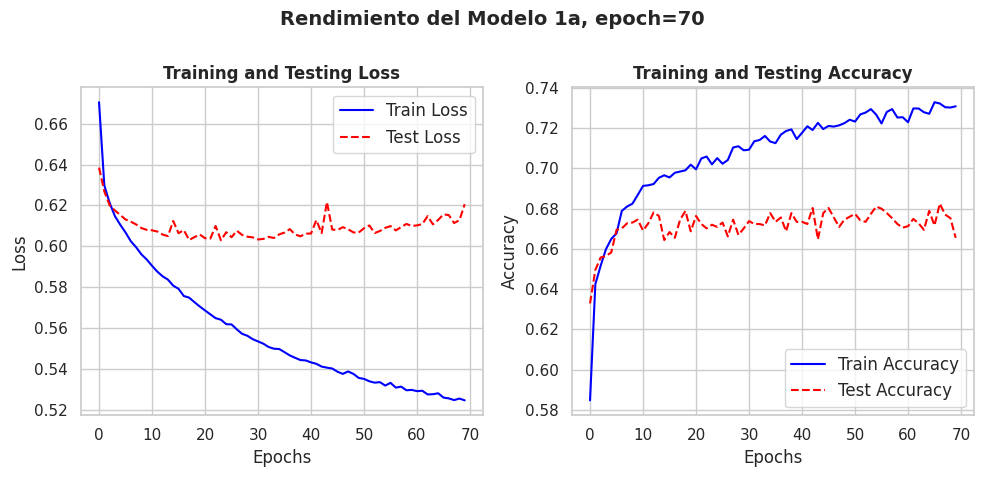

In [ ]:
graficar(historia1a, nombre="Rendimiento del Modelo 1a, epoch=70")

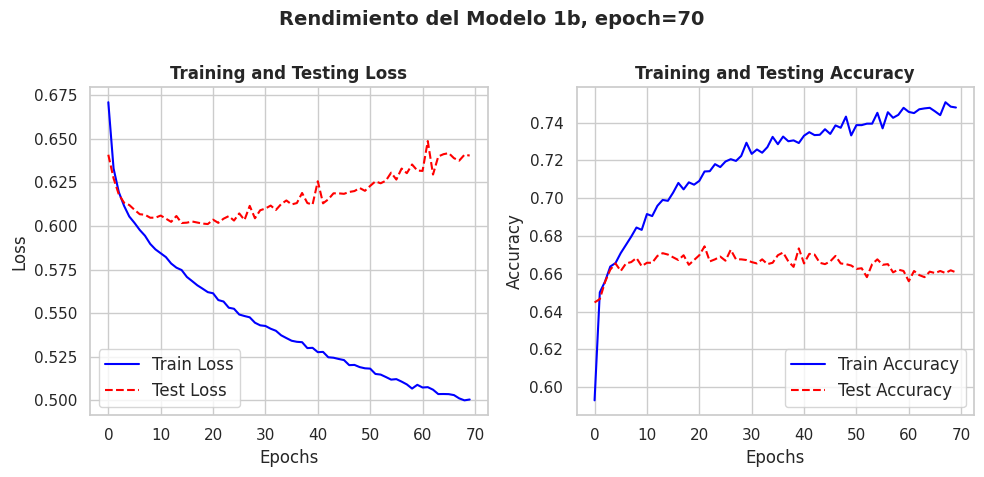

In [ ]:
graficar(historia1b, nombre="Rendimiento del Modelo 1b, epoch=70")

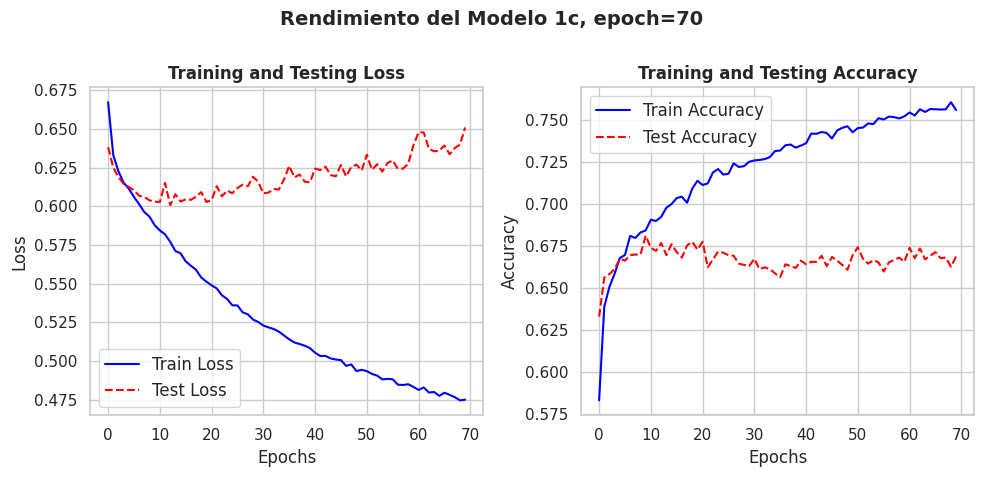

In [ ]:
graficar(historia1c, nombre="Rendimiento del Modelo 1c, epoch=70")

Según el gráfico anterior, es evidente que los modelos presentan signos de sobreajuste. Hay una brecha muy marcada entre los valores de precisión y pérdida de train y test a lo largo del proceso de entrenamiento, lo que indica que el modelo no está aprendiendo sino memorizando los datos por lo que su desempeño con datos no vistos es malo. De manera similar, la pérdida del modelo en los datos de prueba se va alejando de la pérdida de entrenamiento, lo que refuerza la afirmación de una no generalización.

Al modelo1a es el que menos mal le fue y es el que solo tiene una capa, esto nos indicaría que el modelo necesita simplificarse, y una forma de hacerlo es apagando neuronas en cada iteracción, y esto lo logramos usando DROP OUT.

<h2 style="color:black;" > 9.2. Modelo 2 <a id="23"></a> </h2>

Se crea y se diseña el Modelo 2:

In [ ]:
def diseñar_modelo_dropout(dim_entrada, capas, nombre):

    modelo = Sequential()

    modelo.add(Dense(capas[0], activation='relu', input_shape=(dim_entrada,), name='capa_1'))

    modelo.add(Dropout(.5))

    if len(capas)>1:
        i = 1
        while i < len(capas):
            modelo.add(Dense(capas[i], activation='relu', name='capa_'+str(i+1)))
            modelo.add(Dropout(.5))
            i += 1

    modelo.add(Dense(1, activation='sigmoid', name='capa_salida'))

    modelo._name = nombre
    modelo.summary()

    return modelo

In [ ]:
dim_entrada = 44

capas2a = [22]
capas2b = [22, 11]
capas2c = [22, 11, 6]

modelo2a = diseñar_modelo_dropout(dim_entrada, capas2a, 'modelo_2a')
modelo2b = diseñar_modelo_dropout(dim_entrada, capas2b, 'modelo_2b')
modelo2c = diseñar_modelo_dropout(dim_entrada, capas2c, 'modelo_2c')

Model: "modelo_2a"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 22)                990       
                                                                 
 dropout_13 (Dropout)        (None, 22)                0         
                                                                 
 capa_salida (Dense)         (None, 1)                 23        
                                                                 
Total params: 1013 (3.96 KB)
Trainable params: 1013 (3.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "modelo_2b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 22)                990       
                                                                 
 dropo

Se compila el modelo:

In [ ]:
modelo2a.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

modelo2b.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

modelo2c.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

Se entrena el modelo con 70 épocas:

In [ ]:
nepochs = 1000
historia2a = modelo2a.fit(X3_filtro_train, y3_filtro_train, epochs=nepochs, validation_data=(X3_filtro_test, y3_filtro_test), verbose=1)

Epoch 1/1000
202/202 [==============================] - 6s 26ms/step - loss: 0.7069 - accuracy: 0.5547 - val_loss: 0.6463 - val_accuracy: 0.6383
Epoch 2/1000
202/202 [==============================] - 1s 5ms/step - loss: 0.6552 - accuracy: 0.6157 - val_loss: 0.6386 - val_accuracy: 0.6416
Epoch 3/1000
202/202 [==============================] - 1s 4ms/step - loss: 0.6515 - accuracy: 0.6194 - val_loss: 0.6318 - val_accuracy: 0.6499
Epoch 4/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.6457 - accuracy: 0.6266 - val_loss: 0.6277 - val_accuracy: 0.6488
Epoch 5/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.6390 - accuracy: 0.6360 - val_loss: 0.6239 - val_accuracy: 0.6557
Epoch 6/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.6348 - accuracy: 0.6463 - val_loss: 0.6206 - val_accuracy: 0.6575
Epoch 7/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.6306 - accuracy: 0.6475 - val_loss: 0.6168 - val_accuracy

In [ ]:
nepochs = 1000
historia2b = modelo2b.fit(X3_filtro_train, y3_filtro_train, epochs=nepochs, validation_data=(X3_filtro_test, y3_filtro_test), verbose=1)

Epoch 1/1000
202/202 [==============================] - 6s 26ms/step - loss: 0.7208 - accuracy: 0.5123 - val_loss: 0.6870 - val_accuracy: 0.5554
Epoch 2/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.6889 - accuracy: 0.5409 - val_loss: 0.6819 - val_accuracy: 0.5590
Epoch 3/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.6821 - accuracy: 0.5530 - val_loss: 0.6732 - val_accuracy: 0.5923
Epoch 4/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.6722 - accuracy: 0.5840 - val_loss: 0.6595 - val_accuracy: 0.6173
Epoch 5/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.6617 - accuracy: 0.6030 - val_loss: 0.6502 - val_accuracy: 0.6408
Epoch 6/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.6667 - accuracy: 0.5966 - val_loss: 0.6497 - val_accuracy: 0.6455
Epoch 7/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.6591 - accuracy: 0.6101 - val_loss: 0.6454 - val_accuracy

In [ ]:
nepochs = 1000
historia2c = modelo2c.fit(X3_filtro_train, y3_filtro_train, epochs=nepochs, validation_data=(X3_filtro_test, y3_filtro_test), verbose=1)

Epoch 1/1000
202/202 [==============================] - 6s 24ms/step - loss: 0.7485 - accuracy: 0.5024 - val_loss: 0.6897 - val_accuracy: 0.5445
Epoch 2/1000
202/202 [==============================] - 1s 5ms/step - loss: 0.6929 - accuracy: 0.5409 - val_loss: 0.6885 - val_accuracy: 0.5420
Epoch 3/1000
202/202 [==============================] - 1s 4ms/step - loss: 0.6896 - accuracy: 0.5451 - val_loss: 0.6884 - val_accuracy: 0.5413
Epoch 4/1000
202/202 [==============================] - 1s 5ms/step - loss: 0.6872 - accuracy: 0.5524 - val_loss: 0.6872 - val_accuracy: 0.5431
Epoch 5/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.6866 - accuracy: 0.5608 - val_loss: 0.6850 - val_accuracy: 0.5485
Epoch 6/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.6810 - accuracy: 0.5758 - val_loss: 0.6817 - val_accuracy: 0.5608
Epoch 7/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.6831 - accuracy: 0.5702 - val_loss: 0.6800 - val_accuracy

Pérdida de entrenamiento y prueba, y la evolución de la precisión a lo largo de las épocas:

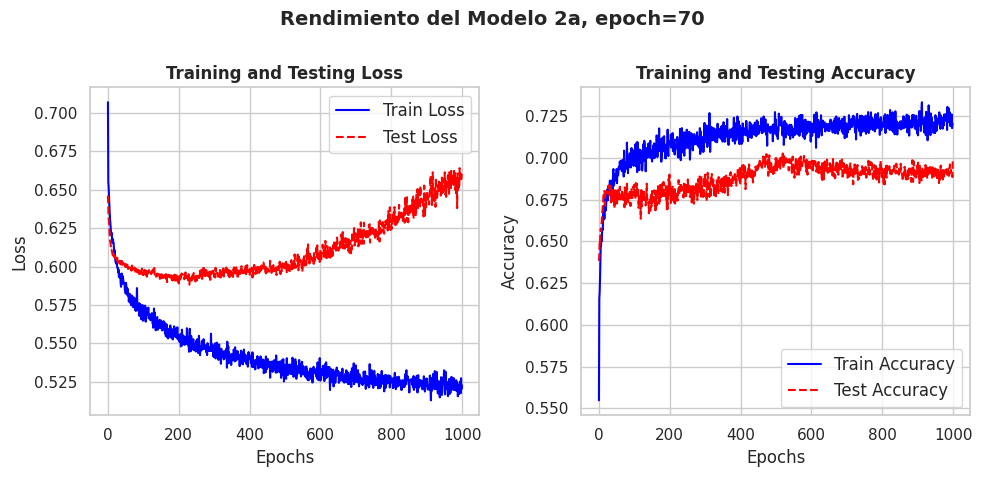

In [ ]:
graficar(historia2a, nombre="Rendimiento del Modelo 2a, epoch=70")

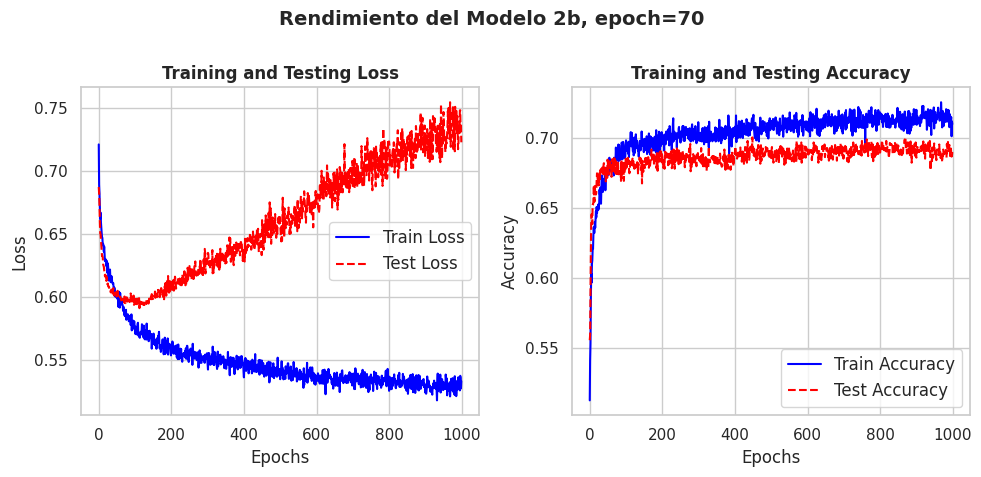

In [ ]:
graficar(historia2b, nombre="Rendimiento del Modelo 2b, epoch=70")

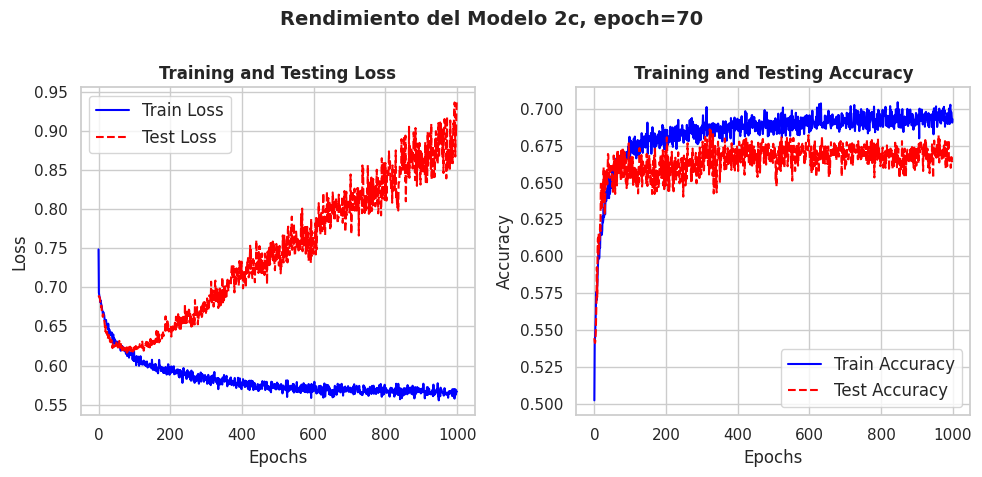

In [ ]:
graficar(historia2c, nombre="Rendimiento del Modelo 2c, epoch=70")

Los modelos mejoraron ligeramente pero siguen presentando sobreajuste, es decir, los modelos están memorizando los datos de entrenamiento. Además una característica importante a destacar en estos modelos es que son un claro ejemplo de casos de gradientes que explotan (Exploding) donde la pérdida crece de forma exponencial. Aquí los pesos crecen muy rápido en cada interacción, por lo que es necesario usar la regularización de decaimiento de los pesos (Wheight Decay:L2).

<h2 style="color:black;" > 9.3. Modelo 3 <a id="24"></a> </h2>

Se crea y se diseña el Modelo 3:

In [ ]:
def diseñar_modelo_reg(dim_entrada, capas, nombre):

    modelo = Sequential()

    modelo.add(Dense(capas[0], activation='relu', input_shape=(dim_entrada,),
                      kernel_regularizer=l2(), name='capa_1'))

    modelo.add(Dropout(.5))

    if len(capas)>1:
        i = 1
        while i < len(capas):
            modelo.add(Dense(capas[i], activation='relu', kernel_regularizer=l2(), name='capa_'+str(i+1)))
            modelo.add(Dropout(.5))
            i += 1

    modelo.add(Dense(1, activation='sigmoid', name='capa_salida'))

    modelo._name = nombre
    modelo.summary()

    return modelo

In [ ]:
dim_entrada = 44

capas3a = [22]
capas3b = [22, 11]
capas3c = [22, 11, 6]

modelo3a = diseñar_modelo_reg(dim_entrada, capas3a, 'modelo_3a')
modelo3b = diseñar_modelo_reg(dim_entrada, capas3b, 'modelo_3b')
modelo3c = diseñar_modelo_reg(dim_entrada, capas3c, 'modelo_3c')

Model: "modelo_3a"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 22)                990       
                                                                 
 dropout_19 (Dropout)        (None, 22)                0         
                                                                 
 capa_salida (Dense)         (None, 1)                 23        
                                                                 
Total params: 1013 (3.96 KB)
Trainable params: 1013 (3.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "modelo_3b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 22)                990       
                                                                 
 dropo

Se compila el modelo:

In [ ]:
modelo3a.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

modelo3b.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

modelo3c.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Se entrena el modelo con 70 épocas:

In [ ]:
nepochs = 1000
historia3a = modelo3a.fit(X3_filtro_train, y3_filtro_train, epochs=nepochs, validation_data=(X3_filtro_test, y3_filtro_test), verbose=1)

Epoch 1/250
202/202 [==============================] - 5s 21ms/step - loss: 0.9919 - accuracy: 0.5007 - val_loss: 0.9459 - val_accuracy: 0.5311
Epoch 2/250
202/202 [==============================] - 1s 5ms/step - loss: 0.9370 - accuracy: 0.5411 - val_loss: 0.9147 - val_accuracy: 0.5786
Epoch 3/250
202/202 [==============================] - 1s 4ms/step - loss: 0.9050 - accuracy: 0.5792 - val_loss: 0.8893 - val_accuracy: 0.5956
Epoch 4/250
202/202 [==============================] - 1s 5ms/step - loss: 0.8828 - accuracy: 0.5916 - val_loss: 0.8662 - val_accuracy: 0.6010
Epoch 5/250
202/202 [==============================] - 1s 5ms/step - loss: 0.8595 - accuracy: 0.6013 - val_loss: 0.8460 - val_accuracy: 0.6072
Epoch 6/250
202/202 [==============================] - 1s 3ms/step - loss: 0.8434 - accuracy: 0.5960 - val_loss: 0.8278 - val_accuracy: 0.6191
Epoch 7/250
202/202 [==============================] - 1s 2ms/step - loss: 0.8268 - accuracy: 0.6025 - val_loss: 0.8121 - val_accuracy: 0.630

In [ ]:
nepochs = 1000
historia3b = modelo3b.fit(X3_filtro_train, y3_filtro_train, epochs=nepochs, validation_data=(X3_filtro_test, y3_filtro_test), verbose=1)

Epoch 1/1000
202/202 [==============================] - 5s 23ms/step - loss: 1.1305 - accuracy: 0.5074 - val_loss: 1.0686 - val_accuracy: 0.5358
Epoch 2/1000
202/202 [==============================] - 1s 5ms/step - loss: 1.0665 - accuracy: 0.5238 - val_loss: 1.0364 - val_accuracy: 0.5431
Epoch 3/1000
202/202 [==============================] - 1s 5ms/step - loss: 1.0319 - accuracy: 0.5333 - val_loss: 1.0081 - val_accuracy: 0.5445
Epoch 4/1000
202/202 [==============================] - 1s 4ms/step - loss: 1.0001 - accuracy: 0.5397 - val_loss: 0.9822 - val_accuracy: 0.5445
Epoch 5/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.9744 - accuracy: 0.5437 - val_loss: 0.9588 - val_accuracy: 0.5438
Epoch 6/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.9509 - accuracy: 0.5470 - val_loss: 0.9368 - val_accuracy: 0.5449
Epoch 7/1000
202/202 [==============================] - 1s 3ms/step - loss: 0.9270 - accuracy: 0.5521 - val_loss: 0.9158 - val_accuracy

In [ ]:
nepochs = 1000
historia3c = modelo3c.fit(X3_filtro_train, y3_filtro_train, epochs=nepochs, validation_data=(X3_filtro_test, y3_filtro_test), verbose=1)

Epoch 1/1000
202/202 [==============================] - 4s 18ms/step - loss: 1.2287 - accuracy: 0.5091 - val_loss: 1.1628 - val_accuracy: 0.5427
Epoch 2/1000
202/202 [==============================] - 1s 3ms/step - loss: 1.1539 - accuracy: 0.5190 - val_loss: 1.1230 - val_accuracy: 0.5402
Epoch 3/1000
202/202 [==============================] - 1s 3ms/step - loss: 1.1087 - accuracy: 0.5271 - val_loss: 1.0881 - val_accuracy: 0.5406
Epoch 4/1000
202/202 [==============================] - 1s 5ms/step - loss: 1.0757 - accuracy: 0.5314 - val_loss: 1.0566 - val_accuracy: 0.5406
Epoch 5/1000
202/202 [==============================] - 1s 5ms/step - loss: 1.0437 - accuracy: 0.5358 - val_loss: 1.0278 - val_accuracy: 0.5406
Epoch 6/1000
202/202 [==============================] - 1s 4ms/step - loss: 1.0150 - accuracy: 0.5367 - val_loss: 1.0014 - val_accuracy: 0.5406
Epoch 7/1000
202/202 [==============================] - 1s 5ms/step - loss: 0.9887 - accuracy: 0.5383 - val_loss: 0.9772 - val_accuracy

Pérdida de entrenamiento y validación, y la evolución de la precisión a lo largo de las épocas:

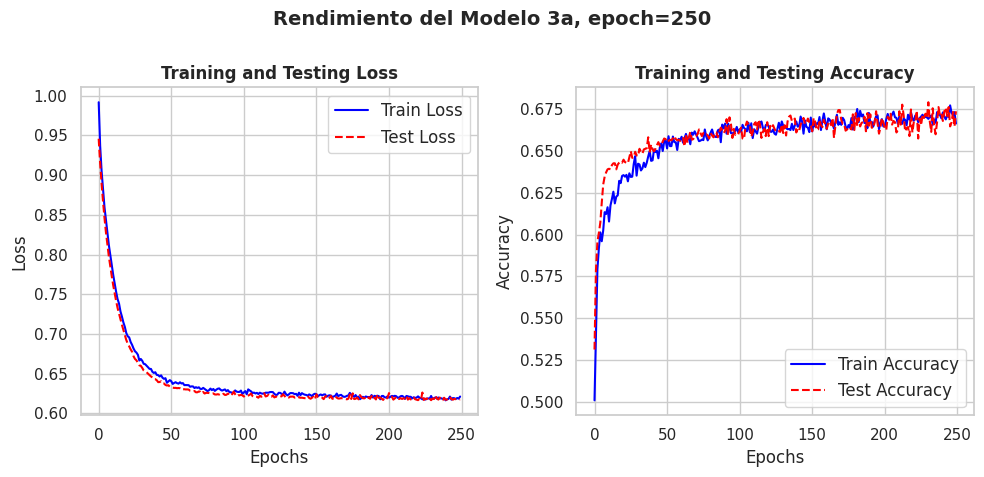

In [ ]:
graficar(historia3a, nombre="Rendimiento del Modelo 3a, epoch=250")

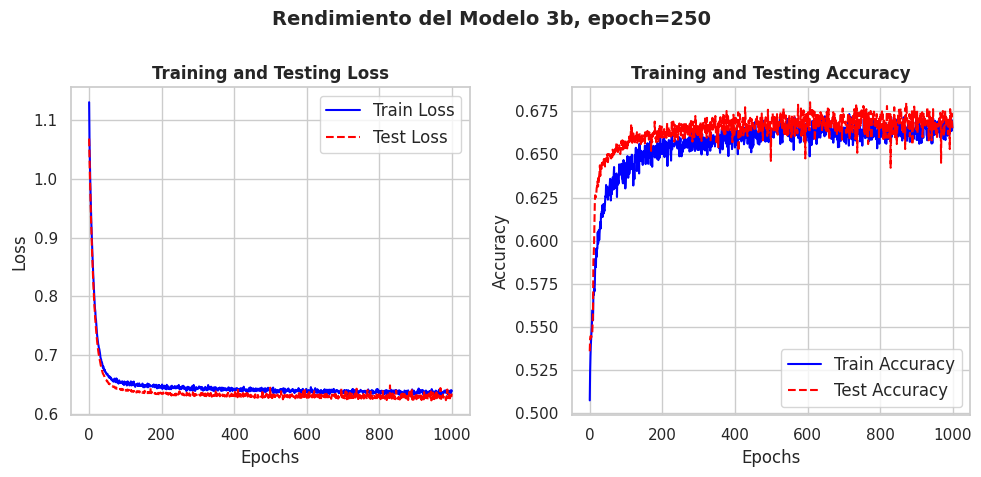

In [ ]:
graficar(historia3b, nombre="Rendimiento del Modelo 3b, epoch=250")

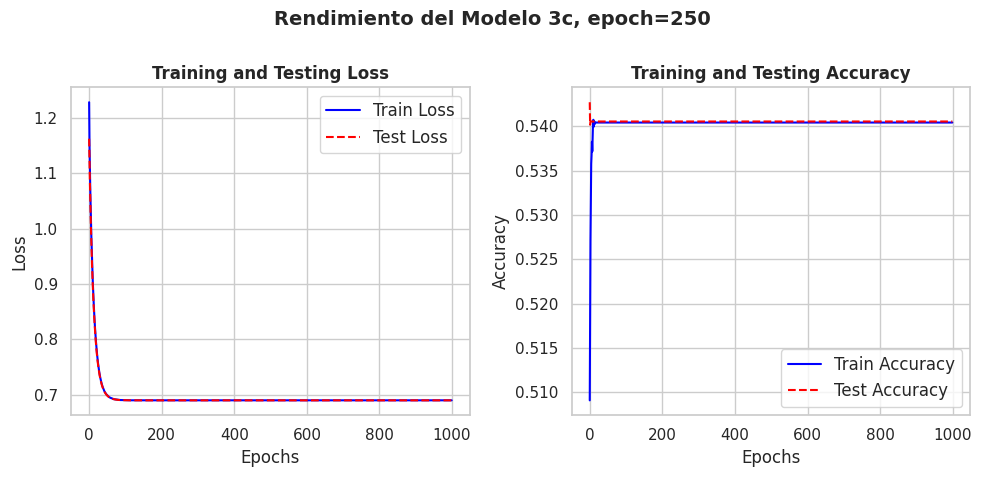

In [ ]:
graficar(historia3c, nombre="Rendimiento del Modelo 3c, epoch=250")

<div style="text-align: left; margin-top: 2rem;">
  <button style="padding: 10px 20px; font-size: 12px; cursor: pointer; background-color: #f0f0f0; color: white; border: none;">
    <a href="#indice" style="color: black; text-decoration: none;">Regresar Tabla de contenido</a><br>
  </button>
</div>

Los tres modelos mejoraron considerablemente. El mejor modelo parece ser el Modelo 3a ya que tiene ligeramente un mayor accuracy y menor pérdida. Por lo tanto, el entrenamiento se ejecutará durante un máximo de 1000 épocas o hasta que se cumpla la condición de parada temprana.

La devolución de llamada EarlyStopping se emplea para monitorear la pérdida de validación y detener el proceso de entrenamiento cuando no ha habido ninguna mejora durante un cierto número de épocas, asegurando que el modelo no desperdicie tiempo ni recursos computacionales.

In [ ]:
modelo3a_mejor = diseñar_modelo_reg(dim_entrada, capas3a, 'modelo_3a_mejor')

Model: "modelo_3a_mejor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 22)                990       
                                                                 
 dropout_12 (Dropout)        (None, 22)                0         
                                                                 
 capa_salida (Dense)         (None, 1)                 23        
                                                                 
Total params: 1013 (3.96 KB)
Trainable params: 1013 (3.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
epochs = 2000
optimizer = Adam()


modelo3a_mejor.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

historia_mejor_modelo = modelo3a_mejor.fit(X3_filtro_train, y3_filtro_train,
                                    epochs=epochs,
                                    validation_data=(X3_filtro_test, y3_filtro_test),
                                    callbacks=[early_stopping], verbose=1)

Epoch 1/2000
202/202 [==============================] - 4s 17ms/step - loss: 0.8743 - accuracy: 0.5715 - val_loss: 0.7624 - val_accuracy: 0.6372
Epoch 2/2000
202/202 [==============================] - 1s 2ms/step - loss: 0.7380 - accuracy: 0.6171 - val_loss: 0.6956 - val_accuracy: 0.6455
Epoch 3/2000
202/202 [==============================] - 1s 3ms/step - loss: 0.6914 - accuracy: 0.6353 - val_loss: 0.6666 - val_accuracy: 0.6470
Epoch 4/2000
202/202 [==============================] - 1s 3ms/step - loss: 0.6746 - accuracy: 0.6371 - val_loss: 0.6552 - val_accuracy: 0.6484
Epoch 5/2000
202/202 [==============================] - 1s 3ms/step - loss: 0.6609 - accuracy: 0.6370 - val_loss: 0.6464 - val_accuracy: 0.6539
Epoch 6/2000
202/202 [==============================] - 1s 3ms/step - loss: 0.6532 - accuracy: 0.6466 - val_loss: 0.6396 - val_accuracy: 0.6513
Epoch 7/2000
202/202 [==============================] - 1s 2ms/step - loss: 0.6458 - accuracy: 0.6512 - val_loss: 0.6388 - val_accuracy

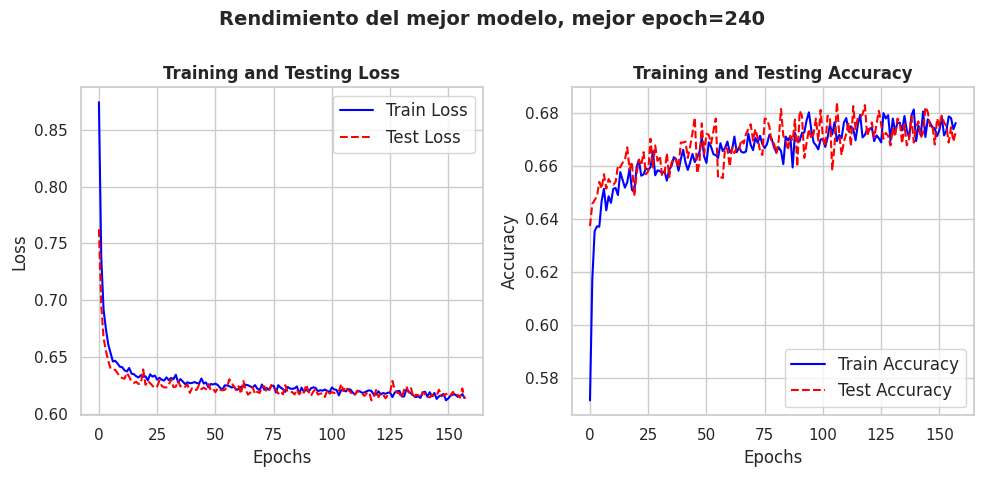

In [ ]:
graficar(historia_mejor_modelo, nombre="Rendimiento del mejor modelo, mejor epoch=240")

Se observa variabilidad en las métricas monitoreadas, sin embargo, es relativamente baja (menor al 1% de variación de una época a otra). El entrenamiento se detuvo en la época 185, sin embargo, las predicciones se harán con los pesos de la época 118 que fue la mejor.

<div style="text-align: left; margin-top: 2rem;">
  <button style="padding: 10px 20px; font-size: 12px; cursor: pointer; background-color: #f0f0f0; color: white; border: none;">
    <a href="#indice" style="color: black; text-decoration: none;">Regresar Tabla de contenido</a><br>
  </button>
</div>

<h1 style="color:black;" > 2.5. Evaluación del mejor modelo: Modelo Final <a id="25"></a> </h1>

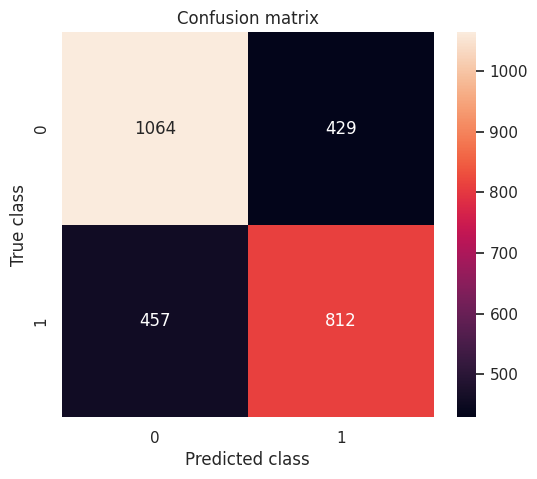

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
mostrar_resultados(y3_filtro_test, y_pred)

In [ ]:
y_pred = modelo3a_mejor.predict(X3_filtro_test)
y_pred = (y_pred >= 0.5).astype(int)
print(classification_report(y3_filtro_test, y_pred))

87/87 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1493
           1       0.65      0.64      0.65      1269

    accuracy                           0.68      2762
   macro avg       0.68      0.68      0.68      2762
weighted avg       0.68      0.68      0.68      2762



0.6762664960780992


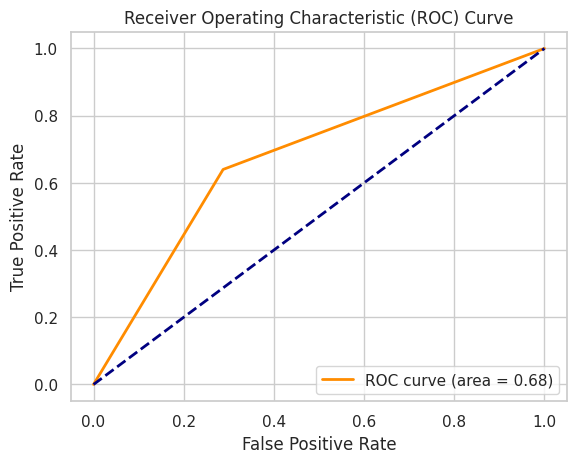

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y3_filtro_test, y_pred)

roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()